# 深度学习基础数学知识(pytorch)

## 线性代数

### 标量
标量由只有一个元素的张量表示。 下面的代码将实例化两个标量，并执行一些熟悉的算术运算，即加法、乘法、除法和指数。

In [50]:
import torch
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x+y, x*y,x/y,x**y,x-y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.), tensor(1.))

### 向量
向量可以被视为标量值组成的列表。 这些标量值被称为向量的元素（element）或分量（component）。人们通过一维张量表示向量。一般来说，张量可以具有任意长度，取决于机器的内存限制。

In [51]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

我们可以使用下标来引用向量的任一元素，例如可以通过$x_i$来引用第$i$个元素。 注意，元素$x_i$是一个标量，所以我们在引用它时不会加粗。 大量文献认为列向量是向量的默认方向，在本书中也是如此。 在数学中，向量$\mathbf{x}$可以写为：
$$\begin{split}\mathbf{x} =\begin{bmatrix}x_{1}  \\x_{2}  \\ \vdots  \\x_{n}\end{bmatrix},\end{split}$$

其中$x_1,\ldots,x_n$是向量的元素。在代码中，我们通过张量的索引来访问任一元素。

In [52]:
x[3]

tensor(3)

### 长度、维度和形状
向量只是一个数字数组，就像每个数组都有一个长度一样，每个向量也是如此。 在数学表示法中，如果我们想说一个向量$\mathbf{x}$由$n$个实值标量组成， 可以将其表示为$\mathbf{x}\in\mathbb{R}^n$。 向量的长度通常称为向量的维度（dimension）。

与普通的Python数组一样，我们可以通过调用Python的内置len()函数来访问张量的长度。

In [53]:
len(x)

4

当用张量表示一个向量（只有一个轴）时，我们也可以通过.shape属性访问向量的长度。 形状（shape）是一个元素组，列出了张量沿每个轴的长度（维数）。 对于只有一个轴的张量，形状只有一个元素。

In [54]:
x.shape

torch.Size([4])

请注意，维度（dimension）这个词在不同上下文时往往会有不同的含义，这经常会使人感到困惑。 为了清楚起见，我们在此明确一下： 向量或轴的维度被用来表示向量或轴的长度，即向量或轴的元素数量。 然而，张量的维度用来表示张量具有的轴数。 在这个意义上，张量的某个轴的维数就是这个轴的长度。

### 矩阵
正如向量将标量从零阶推广到一阶，矩阵将向量从一阶推广到二阶。 矩阵，我们通常用粗体、大写字母来表示 （例如，$\mathbf{X}$、$\mathbf{Y}$和$\mathbf{Z}$）， 在代码中表示为具有两个轴的张量。

$$\begin{split}\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \\ \end{bmatrix}.\end{split}$$

当调用函数来实例化张量时， 我们可以通过指定两个分量$m$和$n$来创建一个形状为$m \times n$的矩阵。

In [55]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [56]:
# 转置
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

作为方阵的一种特殊类型，对称矩阵等于其转置：$\mathbf{A} = \mathbf{A}^\top$。这里定义一个对称矩阵$\mathbf{B}$:

In [57]:
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [58]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 张量
就像向量是标量的推广，矩阵是向量的推广一样，我们可以构建具有更多轴的数据结构。 张量（本小节中的“张量”指代数对象）是描述具有任意数量轴的$n$维数组的通用方法。 例如，向量是一阶张量，矩阵是二阶张量。 张量用特殊字体的大写字母表示（例如，$\mathsf{X}$、$\mathsf{Y}$和$\mathsf{Z}$）， 它们的索引机制（例如$x_{ijk}$和$[\mathsf{X}]_{1,2i-1,3}$）与矩阵类似。

当我们开始处理图像时，张量将变得更加重要，图像以$n$维数组形式出现， 其中3个轴对应于高度、宽度，以及一个通道（channel）轴， 用于表示颜色通道（红色、绿色和蓝色）。 现在先将高阶张量暂放一边，而是专注学习其基础知识。

In [59]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 张量算法的基本性质
标量、向量、矩阵和任意数量轴的张量（本小节中的“张量”指代数对象）有一些实用的属性。 例如，从按元素操作的定义中可以注意到，任何按元素的一元运算都不会改变其操作数的形状。 同样，给定具有相同形状的任意两个张量，任何按元素二元运算的结果都将是相同形状的张量。 例如，将两个相同形状的矩阵相加，会在这两个矩阵上执行元素加法。

In [60]:
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
B = A.clone() # 复制 A 到 B
A,A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [61]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

将张量乘以或加上一个标量不会改变张量的形状，其中张量的每个元素都将与标量相加或相乘。

In [62]:
a = 2
X = torch.arange(24).reshape(2,3,4)
X,a + X,a * X,(a * X).shape

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 tensor([[[ 0,  2,  4,  6],
          [ 8, 10, 12, 14],
          [16, 18, 20, 22]],
 
         [[24, 26, 28, 30],
          [32, 34, 36, 38],
          [40, 42, 44, 46]]]),
 torch.Size([2, 3, 4]))

### 降维
我们可以对任意张量进行的一个有用的操作是计算其元素的和。 数学表示法使用$\sum$符号表示求和。 为了表示长度为$d$的向量中元素的总和，可以记为$\sum_{i=1}^dx_i$。 在代码中可以调用计算求和的函数：
我们可以表示任意形状张量的元素和。 例如，矩阵$\mathbf{A}$中元素的和可以记为$\sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}$。

默认情况下，调用求和函数会沿所有的轴降低张量的维度，使它变为一个标量。 我们还可以指定张量沿哪一个轴来通过求和降低维度。 以矩阵为例，为了通过求和所有行的元素来降维（轴0），可以在调用函数时指定axis=0。 由于输入矩阵沿0轴降维以生成输出向量，因此输入轴0的维数在输出形状中消失。

In [63]:
X = torch.arange(4,dtype=torch.float32)
X, X.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [64]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [65]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape,A

(tensor([40., 45., 50., 55.]),
 torch.Size([4]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

In [66]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape,A

(tensor([ 6., 22., 38., 54., 70.]),
 torch.Size([5]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

沿着行和列对矩阵求和，等价于对矩阵的所有元素进行求和。

In [67]:
A.sum(axis=[0, 1])  # 结果和A.sum()相同

tensor(190.)

In [68]:
A.mean(),A.sum(),A.numel()

(tensor(9.5000), tensor(190.), 20)

In [69]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

### 非降维求和
但是，有时在调用函数来计算总和或均值时保持轴数不变会很有用。


In [70]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [71]:
A,A / sum_A

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[0.0000, 0.1667, 0.3333, 0.5000],
         [0.1818, 0.2273, 0.2727, 0.3182],
         [0.2105, 0.2368, 0.2632, 0.2895],
         [0.2222, 0.2407, 0.2593, 0.2778],
         [0.2286, 0.2429, 0.2571, 0.2714]]))

In [72]:
A, A.cumsum(axis=0),A.cumsum(axis=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  6.,  8., 10.],
         [12., 15., 18., 21.],
         [24., 28., 32., 36.],
         [40., 45., 50., 55.]]),
 tensor([[ 0.,  1.,  3.,  6.],
         [ 4.,  9., 15., 22.],
         [ 8., 17., 27., 38.],
         [12., 25., 39., 54.],
         [16., 33., 51., 70.]]))

### 点积
点积是两个向量的内积，也称为内积，也叫做标量乘积。
给定两个向量$\mathbf{x},\mathbf{y}\in\mathbb{R}^d$， 它们的点积（dot product）$\mathbf{x}^\top\mathbf{y}$ （或$\langle\mathbf{x},\mathbf{y}\rangle$） 是相同位置的按元素乘积的和：$\mathbf{x}^\top \mathbf{y} = \sum_{i=1}^{d} x_i y_i$。


In [73]:
x = torch.arange(4,dtype=torch.float32)
y = torch.ones(4,dtype=torch.float32)
x,y,torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [74]:
torch.sum(x * y)

tensor(6.)

### 矩阵-向量积

$$\begin{split}\mathbf{A}\mathbf{x}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix}\mathbf{x}
= \begin{bmatrix}
 \mathbf{a}^\top_{1} \mathbf{x}  \\
 \mathbf{a}^\top_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^\top_{m} \mathbf{x}\\
\end{bmatrix}.\end{split}$$

在代码中使用张量表示矩阵-向量积，我们使用mv函数。 当我们为矩阵A和向量x调用torch.mv(A, x)时，会执行矩阵-向量积。 注意，A的列维数（沿轴1的长度）必须与x的维数（其长度）相同。

In [75]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

### 矩阵-矩阵乘法
$$\begin{split}\mathbf{A}=\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{bmatrix},\quad
\mathbf{B}=\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{bmatrix}.\end{split}$$

$$\begin{split}\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix},
\quad \mathbf{B}=\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}.\end{split}$$

$$\begin{split}\mathbf{C} = \mathbf{AB} = \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix}
\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \mathbf{b}_1 & \mathbf{a}^\top_{1}\mathbf{b}_2& \cdots & \mathbf{a}^\top_{1} \mathbf{b}_m \\
 \mathbf{a}^\top_{2}\mathbf{b}_1 & \mathbf{a}^\top_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^\top_{2} \mathbf{b}_m \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^\top_{n} \mathbf{b}_1 & \mathbf{a}^\top_{n}\mathbf{b}_2& \cdots& \mathbf{a}^\top_{n} \mathbf{b}_m
\end{bmatrix}.\end{split}$$

我们可以将矩阵-矩阵乘法$\mathbf{AB}$看作简单地执行$m$次矩阵-向量积，并将结果拼接在一起，形成一个$n \times m$矩阵。 在下面的代码中，我们在A和B上执行矩阵乘法。 这里的A是一个5行4列的矩阵，B是一个4行3列的矩阵。 两者相乘后，我们得到了一个5行3列的矩阵。

In [76]:
B = torch.ones(4, 3)

A,B,torch.mm(A, B)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

### 范数
线性代数中最有用的一些运算符是范数（norm）。 非正式地说，向量的范数是表示一个向量有多大。 这里考虑的大小（size）概念不涉及维度，而是分量的大小。
在线性代数中，向量范数是将向量映射到标量的函数$f$。 给定任意向量$\mathbf{x}$，向量范数要满足一些属性。 

第一个性质是：如果我们按常数因子$\alpha$缩放向量的所有元素， 其范数也会按相同常数因子的绝对值缩放：
$$f(\alpha \mathbf{x}) = |\alpha| f(\mathbf{x}).$$
第二个性质是熟悉的三角不等式：
$$f(\mathbf{x} + \mathbf{y}) \leq f(\mathbf{x}) + f(\mathbf{y}).$$
第三个性质简单地说范数必须是非负的:
$$f(\mathbf{x}) \geq 0.$$
这是有道理的。因为在大多数情况下，任何东西的最小的大小是0。 最后一个性质要求范数最小为0，当且仅当向量全由0组成。
$$\forall i, [\mathbf{x}]_i = 0 \Leftrightarrow f(\mathbf{x})=0.$$
范数听起来很像距离的度量。 欧几里得距离和毕达哥拉斯定理中的非负性概念和三角不等式可能会给出一些启发。 事实上，欧几里得距离是一个$L_2$范数： 假设$n$维向量$\mathbf{x}$中的元素是$x_1,\ldots,x_n$，其$L_2$范数是向量元素平方和的平方根
$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},$$
其中，在$L_2$范数中常常省略下标$2$，也就是说$\|\mathbf{x}\|$等同于$\|\mathbf{x}\|_2$。 在代码中，我们可以按如下方式计算向量的$L_2$范数。

In [77]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

深度学习中更经常地使用$L_2$范数的平方，也会经常遇到$L_1$范数，它表示为向量元素的绝对值之和:
$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$$
与$L_2$范数相比，$L_1$范数受异常值的影响较小。 为了计算$L_1$范数，我们将绝对值函数和按元素求和组合起来。

In [78]:
torch.abs(u).sum()

tensor(7.)

$L_2$范数和$L_1$范数都是更一般的$L_p$范数的特例：
$$\|\mathbf{x}\|_p = \left(\sum_{i=1}^n \left|x_i \right|^p \right)^{1/p}.$$
类似于向量的$L_2$范数，矩阵$\mathbf{X} \in \mathbb{R}^{m \times n}$的Frobenius范数（Frobenius norm）是矩阵元素平方和的平方根：
$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$$
Frobenius范数满足向量范数的所有性质，它就像是矩阵形向量的
范数。 调用以下函数将计算矩阵的Frobenius范数。


In [79]:
torch.norm(torch.ones((4,9)))

tensor(6.)

#### 范数和目标
在深度学习中，我们经常试图解决优化问题： 最大化分配给观测数据的概率; 最小化预测和真实观测之间的距离。 用向量表示物品（如单词、产品或新闻文章），以便最小化相似项目之间的距离，最大化不同项目之间的距离。 目标，或许是深度学习算法最重要的组成部分（除了数据），通常被表达为范数。

### 小结
- 标量、向量、矩阵和张量是线性代数中的基本数学对象。

- 向量泛化自标量，矩阵泛化自向量。

- 标量、向量、矩阵和张量分别具有零、一、二和任意数量的轴。

- 一个张量可以通过sum和mean沿指定的轴降低维度。

- 两个矩阵的按元素乘法被称为他们的Hadamard积。它与矩阵乘法不同。

- 在深度学习中，我们经常使用范数，如$L_1$范数、$L_2$范数和Frobenius范数。

- 我们可以对标量、向量、矩阵和张量执行各种操作。

## 微积分
在深度学习中，我们“训练”模型，不断更新它们，使它们在看到越来越多的数据时变得越来越好。 通常情况下，变得更好意味着最小化一个损失函数（loss function）， 即一个衡量“模型有多糟糕”这个问题的分数。 最终，我们真正关心的是生成一个模型，它能够在从未见过的数据上表现良好。 但“训练”模型只能将模型与我们实际能看到的数据相拟合。 因此，我们可以将拟合模型的任务分解为两个关键问题：

- 优化（optimization）：用模型拟合观测数据的过程；

- 泛化（generalization）：数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型。

### 导数和微分
我们首先讨论导数的计算，这是几乎所有深度学习优化算法的关键步骤。 在深度学习中，我们通常选择对于模型参数可微的损失函数。 简而言之，对于每个参数， 如果我们把这个参数增加或减少一个无穷小的量，可以知道损失会以多快的速度增加或减少，假设我们有一个函数$f: \mathbb{R} \rightarrow \mathbb{R}$，其输入和输出都是标量。如果$f$的导数存在，这个极限被定义为$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$
如果$f'(a)$存在，则称$f$在$a$处是可微（differentiable）的。如果$f$在一个区间内的每个数上都是可微的，则此函数在此区间中是可微的。我们可以将上式的导数$f'(x)$解释为$f(x)$相对于$x$的瞬时变换率。所谓的瞬时变化率是基于$x$中的变化$h$,且$h$接近0。
为了更好的解释导数，我们来考虑一个简单的例子，定义$u=f(x)=3x^2-4x$如下：

In [80]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np 
from d2l import torch as d2l
from matplotlib_inline import backend_inline

In [81]:
def f(x):
    return 3 * x ** 2 - 4 * x

通过令$x=1$并让$h$接近$0$，$\frac{f(x+h)-f(x)}{h}$的数值结果接近2。 虽然这个实验不是一个数学证明，但稍后会看到，当$x=1$时，导数$u'$是$2$。

In [82]:
def numerical_lim(f,x,h):
    return (f(x+h)-f(x)) / h
h = 0.1

for i in range(7):
    print(f'h={h:.8f},mumerical limit={numerical_lim(f,1,h):.8f}')
    h*=0.1

h=0.10000000,mumerical limit=2.30000000
h=0.01000000,mumerical limit=2.03000000
h=0.00100000,mumerical limit=2.00300000
h=0.00010000,mumerical limit=2.00030000
h=0.00001000,mumerical limit=2.00003000
h=0.00000100,mumerical limit=2.00000300
h=0.00000010,mumerical limit=2.00000030


让我们熟悉一下导数的几个等价符号，给定$y=f(x)$,其中$x$和$y$分别是函数$f$的自变量和应变量。以下表达式是等价的：
$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$
其中符号$\frac{d}{dx}$和$D$是微分运算符，表示微分操作。我们可以使用一下规则来对常见函数求微分：
 - $DC=0$($C$是一个常数)
 - $Dx^n=nx^{n-1}$(幂律（power rule）$n$是任意实数)
 - $De^x = e^x$
 - $D\ln(x) = 1/x$
 - $D\sin x=cos x$
 - $D\cos x=-sin x$
 - $D\tan x=1+tan^2 x$
 - $D\sec x=sec x \tan x$
 - $D\csc x=-csc x \cot x$
 - $D\cot x=-1+cot^2 x$
 - $D\arctan x= \frac{1}{1+x^2}$
 - $D\sinh x= \cosh x$
 - $D\cosh x= \sinh x$
 - $D\tanh x= \frac{1}{cosh^2 x}$
 - $D\coth x= \frac{1}{coth^2 x}$
 - $D\arcsin x= \frac{1}{1-x^2}$
 - $D\arccos x= -\frac{1}{1-x^2}$
 
 为了微分一个由一些常见函数组成的函数，下面的一些法则方便使用。假设函数$f$和$g$都是可微的，$C$是一个常数，则：
 
 常数相乘法则：
 $$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$
 加法法则：
 $$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$
 乘法法则：
 $$\frac{d}{dx} [f(x)g(x)] = f(x)\frac{d}{dx} [g(x)] + g(x)\frac{d}{dx}[f(x)],$$
 除法法则：
 $$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$
 指数法则：
 $$\frac{d}{dx} [e^x] = e^x \frac{d}{dx} [x] = e^x$$

在上面的等价符号中，我们看到了一些微分的基本规则，这些规则可以帮助我们更容易地计算函数的导数。
现在我们应用上述几个法则来计算$u'=f'(x)=3\frac{d}{dx}x^2-4\frac{d}{dx}x=6x-4$。令$x = 1$,我们有$u'=2$：在这个实验中，数值结果接近2，这一点得到了在前面的实验支持。当$x = 1$时，此导数也是曲线$u=f(x)$切线的斜率。

为了对导数的这种解释进行可视化，我们将使用matplotlib，这是Python中用于绘制图形的库。

In [83]:
def use_svg_display():
    """Use svg format to display plot in jupyter"""
    backend_inline.set_matplotlib_formats('svg')

我们定义set_figsize函数来设置图表大小。注意，这里可以直接使用d2l.plt,因为导入语句from matplotlib import pyplot as plt已标记为保存到d2l中。

In [84]:
def set_figsize(figsize = (3,5,2.5)): # @save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

下面的set_axes函数用于设置由matplotlib生成图表的轴的属性。

In [85]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()    

通过这三个用于图形配置的函数，定义一个plot函数来简洁地绘制多条曲线， 因为我们需要在整个书中可视化许多曲线。

In [86]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

下来我们可以绘制函数$u=f(x)$及其在$x = 1$处的切线$y=2x-3$,其中系数2是切线的斜率。

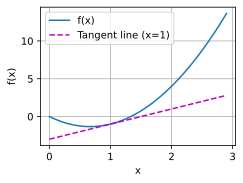

In [87]:
x = np.arange(0,3,0.1)
plot(x,[f(x),2 * x - 3],'x','f(x)',legend=['f(x)','Tangent line (x=1)'])

### 偏导数
到目前为止，我们只讨论了仅含一个变量的函数的微分。在深度学习中，函数通常依赖于许多变量。因此，我们需要将微分的思想推广到多元函数（multivariate function）上。

我们可以使用符号$\frac{\partial f(x_1,x_2)}{\partial x_1}$来表示函数$f(x_1,x_2)$对变量$x_1$的偏导数。

设$y = f(x_1, x_2, \ldots, x_n)$是一个具有$n$个变量的函数，$y$关于第$i$个参数$x_i$的偏导数(partial derivative)为:
$$\frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

为了计算$\frac{\partial y}{\partial x_i}$,我们可以简单地将$x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$看作常数，并计算$y$关于$x_i$的导数。对于偏导数的表示，以下是等价的：
$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

举个例子，我们将计算函数$f(x,y) = x^2 + y^2$关于$x$和$y$的偏导数。我们可以将$y$看作常数，并计算$f(x,y)$关于$x$的导数，得到$2x$。我们可以将$x$看作常数，并计算$f(x,y)$关于$y$的导数，得到$2y$。因此，$\frac{\partial f(x,y)}{\partial x} = 2x$，$\frac{\partial f(x,y)}{\partial y} = 2y$



### 梯度
我们可以连接一个多元函数对其所有变量的偏导数，以得到该函数的梯度(gradient)向量。具体而言，设函数$f:\mathbb{R}^n\rightarrow\mathbb{R}$的输入是一个$n$维向量$\mathbf{x}=[x_1,x_2,\ldots,x_n]^\top$，并且输出是一个标量。函数$f(x)$相对于$X$的梯度是第一个包含$n$个偏导数的向量：  
$$
\nabla f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial f}{\partial x_1}(\mathbf{x}) \\
\frac{\partial f}{\partial x_2}(\mathbf{x}) \\
\vdots \\
\frac{\partial f}{\partial x_n}(\mathbf{x})
\end{bmatrix}
$$
其中$\nabla_{\mathbf{x}} f(\mathbf{x})$通常在没有歧义时被写作$\nabla f(\mathbf{x})$。

假设$X$为$n$维向量，在微分多元函数时经常使用一下规则：
- 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$,都有$\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
- 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$,都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} = \mathbf{A}$
- 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$,都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x} = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
- $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$
同样，对于任何矩阵$\mathbf{X}$,都有$\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$。正如我们之后将看到的，梯度对于设计深度学习中的优化算法有很大的用处。

### 链式法则
然而，上面方法可能很难找到梯度。 这是因为在深度学习中，多元函数通常是复合（composite）的， 所以难以应用上述任何规则来微分这些函数。 幸运的是，链式法则可以被用来微分复合函数。

让我们先考虑单变量函数。假设函数$y=f(u)$和$u=g(x)$都是可微的，根据链式法则：
$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$


现在考虑一个更一般的场景，即函数具有任意数量的变量的情况。 假设可微分函数$y$
有变量$u_1, u_2, \ldots, u_m$，其中每个可微分函数$u_i$都有变量$x_1, x_2, \ldots, x_n$。 注意，$y$是$x_1, x_2, \ldots, x_n$的函数。 对于任意$i = 1, 2, \ldots, n$，链式法则给出：
$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1} \frac{\partial u_1}{\partial x_i} + \frac{\partial y}{\partial u_2} \frac{\partial u_2}{\partial x_i} + \cdots + \frac{\partial y}{\partial u_m} \frac{\partial u_m}{\partial x_i}$$

### 小结
- 微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。

- 导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率。

- 梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。

- 链式法则可以用来微分复合函数。

## 自动微分
求导是几乎所有深度学习优化算法的关键步骤。 虽然求导的计算很简单，只需要一些基本的微积分。 但对于复杂的模型，手工进行更新是一件很痛苦的事情（而且经常容易出错）。

深度学习框架通过自动计算导数，即自动微分（automatic differentiation）来加快求导。 实际中，根据设计好的模型，系统会构建一个计算图（computational graph）， 来跟踪计算是哪些数据通过哪些操作组合起来产生输出。 自动微分使系统能够随后反向传播梯度。 这里，反向传播（backpropagate）意味着跟踪整个计算图，填充关于每个参数的偏导数。

### 一个简单的例子
作为一个演示例子，假设我们想对函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于列向量$\mathbf{x}$求导。 首先，我们创建变量x并为其分配一个初始值。

In [88]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

在我们计算$y$关于$\mathbf{x}$的梯度之前，需要一个地方来存储梯度。 重要的是，我们不会在每次对一个参数求导时都分配新的内存。 因为我们经常会成千上万次地更新相同的参数，每次都分配新的内存可能很快就会将内存耗尽。 注意，一个标量函数关于向量$\mathbf{x}$的梯度是向量，并且与$\mathbf{x}$具有相同的形状。

In [89]:
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad  # 默认值是None

现在计算$y$。

In [90]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

x是一个长度为4的向量，计算x和x的点积，得到了我们赋值给y的标量输出。 接下来，通过调用反向传播函数来自动计算y关于x每个分量的梯度，并打印这些梯度。

In [91]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于$\mathbf{x}$的梯度应为$4\mathbf{x}$。 让我们快速验证这个梯度是否计算正确。

In [92]:
x.grad == 4 * x

tensor([True, True, True, True])

现在计算x的另一个函数

In [93]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 非标量变量的反向传播
当y不是标量时，向量y关于向量x的导数的最自然解释是一个矩阵。 对于高阶和高维的y和x，求导的结果可以是一个高阶张量。

然而，虽然这些更奇特的对象确实出现在高级机器学习中（包括深度学习中）， 但当调用向量的反向计算时，我们通常会试图计算一批训练样本中每个组成部分的损失函数的导数。 这里，我们的目的不是计算微分矩阵，而是单独计算批量中每个样本的偏导数之和。

In [94]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 分离计算
有时，我们希望将某些计算移动到记录的计算图之外。 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。 想象一下，我们想计算z关于x的梯度，但由于某种原因，希望将y视为一个常数， 并且只考虑到x在y被计算后发挥的作用。

这里可以分离y来返回一个新变量u，该变量与y具有相同的值， 但丢弃计算图中如何计算y的任何信息。 换句话说，梯度不会向后流经u到x。 因此，下面的反向传播函数计算z=u*x关于x的偏导数，同时将u作为常数处理， 而不是z=x*x*x关于x的偏导数。

In [95]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

由于记录了y的计算结果，我们可以随后在y上调用反向传播， 得到y=x*x关于的x的导数，即2*x。

In [96]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

###  Python控制流的梯度计算
使用自动微分的一个好处是： 即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度。 在下面的代码中，while循环的迭代次数和if语句的结果都取决于输入a的值。

In [97]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

让我们计算梯度

In [98]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

我们现在可以分析上面定义的f函数。 请注意，它在其输入a中是分段线性的。 换言之，对于任何a，存在某个常量标量k，使得f(a)=k*a，其中k的值取决于输入a，因此可以用d/a验证梯度是否正确。

In [99]:
a.grad == d / a

tensor(True)

### 小结
深度学习框架可以自动计算导数：我们首先将梯度附加到想要对其计算偏导数的变量上，然后记录目标值的计算，执行它的反向传播函数，并访问得到的梯度。

## 概率
简单地说，机器学习就是做出预测。

根据病人的临床病史，我们可能想预测他们在下一年心脏病发作的概率。 在飞机喷气发动机的异常检测中，我们想要评估一组发动机读数为正常运行情况的概率有多大。 在强化学习中，我们希望智能体（agent）能在一个环境中智能地行动。 这意味着我们需要考虑在每种可行的行为下获得高奖励的概率。 当我们建立推荐系统时，我们也需要考虑概率。 例如，假设我们为一家大型在线书店工作，我们可能希望估计某些用户购买特定图书的概率。 为此，我们需要使用概率学。 有完整的课程、专业、论文、职业、甚至院系，都致力于概率学的工作。 所以很自然地，我们在这部分的目标不是教授整个科目。 相反，我们希望教给读者基础的概率知识，使读者能够开始构建第一个深度学习模型， 以便读者可以开始自己探索它。
### 基本概率论
假设我们掷骰子，想知道看到1的几率有多大，而不是看到另一个数字。 如果骰子是公平的，那么所有六个结果$\{1, \ldots, 6\}$都有相同的可能发生， 因此我们可以说$1$发生的概率为$\frac{1}{6}$。

然而现实生活中，对于我们从工厂收到的真实骰子，我们需要检查它是否有瑕疵。 检查骰子的唯一方法是多次投掷并记录结果。 对于每个骰子，我们将观察到$\{1, \ldots, 6\}$中的一个值。 对于每个值，一种自然的方法是将它出现的次数除以投掷的总次数， 即此事件（event）概率的估计值。 大数定律（law of large numbers）告诉我们： 随着投掷次数的增加，这个估计值会越来越接近真实的潜在概率。 让我们用代码试一试！


In [100]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。 笼统来说，可以把分布（distribution）看作对事件的概率分配， 稍后我们将给出的更正式定义。 将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。

为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。 输出是另一个相同长度的向量：它在索引$i$处的值是采样结果中$i$出现的次数。

In [101]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

在估计一个骰子的公平性时，我们希望从同一分布中生成多个样本。 如果用Python的for循环来完成这个任务，速度会慢得惊人。 因此我们使用深度学习框架的函数同时抽取多个样本，得到我们想要的任意形状的独立样本数组。

In [102]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([3., 1., 1., 1., 3., 1.])

现在我们知道如何对骰子进行采样，我们可以模拟1000次投掷。 然后，我们可以统计1000次投掷后，每个数字被投中了多少次。 具体来说，我们计算相对频率，以作为真实概率的估计。

In [103]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1650, 0.1700, 0.1650, 0.1730, 0.1730, 0.1540])

因为我们是从一个公平的骰子中生成的数据，我们知道每个结果都有真实的概率$\frac{1}{6}$， 大约是$0.167$，所以上面输出的估计值看起来不错。

我们也可以看到这些概率如何随着时间的推移收敛到真实概率。 让我们进行500组实验，每组抽取10个样本。

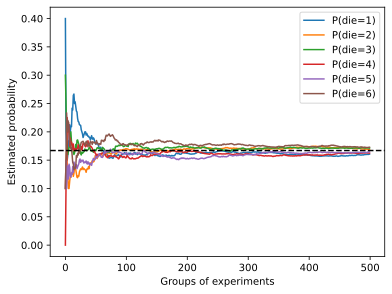

In [104]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()
d2l.plt.show()

每条实线对应于骰子的6个值中的一个，并给出骰子在每组实验后出现值的估计概率。 当我们通过更多的实验获得更多的数据时，这$6$条实体曲线向真实概率收敛。

### 概率论公理
在处理骰子掷出时，我们将集合$\mathcal{S} = \{1, 2, 3, 4, 5, 6\}$称为样本空间（sample space）或结果空间（outcome space）， 其中每个元素都是结果（outcome）。 事件（event）是一组给定样本空间的随机结果。 例如，“看到$5$
”（$\{5\}$）和“看到奇数”（$\{1, 3, 5\}$）都是掷出骰子的有效事件。 注意，如果一个随机实验的结果在$\mathcal{A}$中，则事件$\mathcal{A}$已经发生。 也就是说，如果投掷出$3$点，因为$3 \in \{1, 3, 5\}$，我们可以说，“看到奇数”的事件发生了。

概率（probability）可以被认为是将集合映射到真实值的函数。 在给定的样本空间$\mathcal{S}$中，事件$\mathcal{A}$的概率， 表示为$P(\mathcal{A})$，满足以下属性：

- 对于任意事件$\mathcal{A}$，其概率从不会是负数，即$P(\mathcal{A}) \geq 0$；

- 整个样本空间的概率为$1$，即$P(\mathcal{S}) = 1$；

- 对于互斥（mutually exclusive）事件（对于所有$i \neq j$都有$\mathcal{A}_i \cap \mathcal{A}_j = \emptyset$）的任意一个可数序列$\mathcal{A}_1, \mathcal{A}_2, \ldots$，序列中任意一个事件发生的概率等于它们各自发生的概率之和，即$P(\bigcup_{i=1}^{\infty} \mathcal{A}_i) = \sum_{i=1}^{\infty} P(\mathcal{A}_i)$。

以上也是概率论的公理，由科尔莫戈罗夫于1933年提出。 有了这个公理系统，我们可以避免任何关于随机性的哲学争论； 相反，我们可以用数学语言严格地推理。 例如，假设事件$\mathcal{A}_1$为整个样本空间， 且当所有$i > 1$时的$\mathcal{A}_i = \emptyset$， 那么我们可以证明$$，即不可能发生事件的概率是$P(\emptyset) = 0$。

### 随机变量
在我们掷骰子的随机实验中，我们引入了随机变量（random variable）的概念。 随机变量几乎可以是任何数量，并且它可以在随机实验的一组可能性中取一个值。 考虑一个随机变量$X$，其值在掷骰子的样本空间$\mathcal{S}=\{1,2,3,4,5,6\}$中。 我们可以将事件“看到一个$5$”表示为$\{X=5\}$或$X=5$， 其概率表示为$P(\{X=5\})$或$P(X=5)$。 通过$P(X=a)$，我们区分了随机变量$X$和$X$可以采取的值（例如$a$）。 然而，这可能会导致繁琐的表示。 为了简化符号，一方面，我们可以将$P(X)$表示为随机变量$X$上的分布（distribution）： 分布告诉我们$x$获得某一值的概率。 另一方面，我们可以简单用$P(a)$表示随机变量取值$a$的概率。 由于概率论中的事件是来自样本空间的一组结果，因此我们可以为随机变量指定值的可取范围。 例如，$P(1 \leq X \leq 3)$表示事件$\{1 \leq X \leq 3\}$， 即$\{X = 1, 2, \text{or}, 3\}$的概率。 等价地，$P(1 \leq X \leq 3)$表示随机变量$X$从$\{1, 2, 3\}$中取值的概率。

请注意，离散（discrete）随机变量（如骰子的每一面） 和连续（continuous）随机变量（如人的体重和身高）之间存在微妙的区别。 现实生活中，测量两个人是否具有完全相同的身高没有太大意义。 如果我们进行足够精确的测量，最终会发现这个星球上没有两个人具有完全相同的身高。 在这种情况下，询问某人的身高是否落入给定的区间，比如是否在1.79米和1.81米之间更有意义。 在这些情况下，我们将这个看到某个数值的可能性量化为密度（density）。 高度恰好为1.80米的概率为0，但密度不是0。 在任何两个不同高度之间的区间，我们都有非零的概率

###  处理多个随机变量
很多时候，我们会考虑多个随机变量。 比如，我们可能需要对疾病和症状之间的关系进行建模。 给定一个疾病和一个症状，比如“流感”和“咳嗽”，以某个概率存在或不存在于某个患者身上。 我们需要估计这些概率以及概率之间的关系，以便我们可以运用我们的推断来实现更好的医疗服务。

再举一个更复杂的例子：图像包含数百万像素，因此有数百万个随机变量。 在许多情况下，图像会附带一个标签（label），标识图像中的对象。 我们也可以将标签视为一个随机变量。 我们甚至可以将所有元数据视为随机变量，例如位置、时间、光圈、焦距、ISO、对焦距离和相机类型。 所有这些都是联合发生的随机变量。 当我们处理多个随机变量时，会有若干个变量是我们感兴趣的。

### 联合概率
第一个被称为联合概率（joint probability）$P(A=a,B=b)$。 给定任意值$a$和$b$，联合概率可以回答：$A=a$和$B=b$同时满足的概率是多少？ 请注意，对于任何$a$和$b$的取值，$P(A = a, B=b) \leq P(A=a)$。 这点是确定的，因为要同时发生$A=a$和$B=b$，$A=a$就必须发生，$B=b$也必须发生（反之亦然）。因此，$A=a$和$B=b$同时发生的可能性不大于$A=a$或是$B=b$单独发生的可能性。

### 条件概率
联合概率的不等式带给我们一个有趣的比率： $0 \leq \frac{P(A=a, B=b)}{P(A=a)} \leq 1$。 我们称这个比率为条件概率（conditional probability）， 并用$P(B=b \mid A=a)$表示它：它是$B=b$的概率，前提是$A=a$已发生。

### 贝叶斯定理
使用条件概率的定义，我们可以得出统计学中最有用的方程之一： Bayes定理（Bayes’ theorem）。 根据乘法法则（multiplication rule ）可得到$P(A, B) = P(B \mid A) P(A)$。 根据对称性，可得到$P(A, B) = P(A \mid B) P(B)$。 假设$P(B)>0$，求解其中一个条件变量，我们得到
$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}.$$

请注意，这里我们使用紧凑的表示法： 其中$P(A, B)$是一个联合分布（joint distribution）， $P(A \mid B)$是一个条件分布（conditional distribution）。 这种分布可以在给定值$A = a, B=b$上进行求值。

### 边际化
为了能进行事件概率求和，我们需要求和法则（sum rule）， 即$B$的概率相当于计算$A$的所有可能选择，并将所有选择的联合概率聚合在一起：
$$P(B) = \sum_{A} P(A, B),$$

这也称为边际化（marginalization）。 边际化结果的概率或分布称为边际概率（marginal probability） 或边际分布（marginal distribution）。

### 独立性
另一个有用属性是依赖（dependence）与独立（independence）。 如果两个随机变量$A$和$B$是独立的，意味着事件$A$的发生跟$B$事件的发生无关。 在这种情况下，统计学家通常将这一点表述为$A \perp B$。 根据贝叶斯定理，马上就能同样得到$P(A \mid B) = P(A)$。 在所有其他情况下，我们称$A$和$B$依赖。 比如，两次连续抛出一个骰子的事件是相互独立的。 相比之下，灯开关的位置和房间的亮度并不是（因为可能存在灯泡坏掉、电源故障，或者开关故障）。

由于$P(A \mid B) = \frac{P(A, B)}{P(B)} = P(A)$等价于$P(A, B) = P(A)P(B)$， 因此两个随机变量是独立的，当且仅当两个随机变量的联合分布是其各自分布的乘积。 同样地，给定另一个随机变量$c$时，两个随机变量$A$和$B$是条件独立的（conditionally independent）， 当且仅当$P(A, B \mid C) = P(A \mid C)P(B \mid C)$。 这个情况表示为$A \perp B \mid C$。

### 应用
 假设一个医生对患者进行艾滋病病毒（HIV）测试。 这个测试是相当准确的，如果患者健康但测试显示他患病，这个概率只有1%； 如果患者真正感染HIV，它永远不会检测不出。 我们使用$D_1$
来表示诊断结果（如果阳性，则为$1$
，如果阴性，则为$0$
）， $H$
来表示感染艾滋病病毒的状态（如果阳性，则为$1$
，如果阴性，则为$0$
）。
| 条件概率 | \( H = 1 \) | \( H = 0 \) |
|---------|:----------:|:----------:|
| \( P(D_1 = 1 \| H) \) | 1         | 0.01      |
| \( P(D_1 = 0 \| H) \) | 0         | 0.99      |

每列的加和都是1（但每行的加和不是），因为条件概率需要总和为1，就像概率一样。 让我们计算如果测试出来呈阳性，患者感染HIV的概率，即$P(H = 1 \mid D_1 = 1)$。 显然，这将取决于疾病有多常见，因为它会影响错误警报的数量。 假设人口总体是相当健康的，例如，$P(H=1) = 0.0015$。 为了应用贝叶斯定理，我们需要运用边际化和乘法法则来确定。
$$\begin{split}\begin{aligned}
&P(D_1 = 1) \\
=& P(D_1=1, H=0) + P(D_1=1, H=1)  \\
=& P(D_1=1 \mid H=0) P(H=0) + P(D_1=1 \mid H=1) P(H=1) \\
=& 0.011485.
\end{aligned}\end{split}$$

因此，我们得到

$$\begin{split}\begin{aligned}
&P(H = 1 \mid D_1 = 1)\\ =& \frac{P(D_1=1 \mid H=1) P(H=1)}{P(D_1=1)} \\ =& 0.1306 \end{aligned}.\end{split}$$

换句话说，尽管使用了非常准确的测试，患者实际上患有艾滋病的几率只有13.06%。 正如我们所看到的，概率可能是违反直觉的。


### 期望和方差
为了概括概率分布的关键特征，我们需要一些测量方法。 一个随机变量$X$的期望（expectation，或平均值（average））表示为:
$$E[X] = \sum_{x} x P(X = x).$$
当函数$f(x)$的输入是从分布$P$中抽取的随机变量时，$f(x)$的期望值为:
$$E_{x \sim P}[f(x)] = \sum_x f(x) P(x).$$

在许多情况下，我们希望衡量随机变量$X$与其期望值的偏置。这可以通过方差来量化
$$\mathrm{Var}[X] = E\left[(X - E[X])^2\right] =
E[X^2] - E[X]^2.$$
方差的平方根被称为标准差（standard deviation）。 随机变量函数的方差衡量的是：当从该随机变量分布中采样不同值$x$时， 函数值偏离该函数的期望的程度：
$$\mathrm{Var}[f(x)] = E\left[\left(f(x) - E[f(x)]\right)^2\right].$$


### 小结

- 我们可以从概率分布中采样。

- 我们可以使用联合分布、条件分布、Bayes定理、边缘化和独立性假设来分析多个随机变量。

- 期望和方差为概率分布的关键特征的概括提供了实用的度量形式。

# 线性神经网络

## 线性回归
回归（regression）是能为一个或多个自变量与因变量之间关系建模的一类方法。 在自然科学和社会科学领域，回归经常用来表示输入和输出之间的关系。

在机器学习领域中的大多数任务通常都与预测（prediction）有关。 当我们想预测一个数值时，就会涉及到回归问题。 常见的例子包括：预测价格（房屋、股票等）、预测住院时间（针对住院病人等）、 预测需求（零售销量等）。 但不是所有的预测都是回归问题。 在后面的章节中，我们将介绍分类问题。分类问题的目标是预测数据属于一组类别中的哪一个。
### 线性回归的基本元素
线性回归（linear regression）可以追溯到19世纪初， 它在回归的各种标准工具中最简单而且最流行。 线性回归基于几个简单的假设： 首先，假设自变量$x$和因变量$y$之间的关系是线性的， 即$y$可以表示为$x$中元素的加权和，这里通常允许包含观测值的一些噪声； 其次，我们假设任何噪声都比较正常，如噪声遵循正态分布。

为了解释线性回归，我们举一个实际的例子： 我们希望根据房屋的面积（平方英尺）和房龄（年）来估算房屋价格（美元）。 为了开发一个能预测房价的模型，我们需要收集一个真实的数据集。 这个数据集包括了房屋的销售价格、面积和房龄。 在机器学习的术语中，该数据集称为训练数据集（training data set） 或训练集（training set）。 每行数据（比如一次房屋交易相对应的数据）称为样本（sample）， 也可以称为数据点（data point）或数据样本（data instance）。 我们把试图预测的目标（比如预测房屋价格）称为标签（label）或目标（target）。 预测所依据的自变量（面积和房龄）称为特征（feature）或协变量（covariate）。

通常，我们使用$n$来表示数据集中的样本数。 对索引为$i$的样本，其输入表示为$\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$， 其对应的标签是$y^{(i)}$。

### 线性模型
线性假设是指目标（房屋价格）可以表示为特征（面积和房龄）的加权和，如下面的式子：
$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b.$$

上述中的$w_{area}$和$w_{age}$称为权重（weight），权重决定了每个特征对我们预测值的影响。 我们把$b$称为偏置（bias）、偏移量（offset）或截距（intercept）。 偏置是指当所有特征都取值为0时，预测值应该为多少。 即使现实中不会有任何房子的面积是0或房龄正好是0年，我们仍然需要偏置项。 如果没有偏置项，我们模型的表达能力将受到限制。 严格来说， 上述式子是输入特征的一个 仿射变换（affine transformation）。 仿射变换的特点是通过加权和对特征进行线性变换（linear transformation）， 并通过偏置项来进行平移（translation）。

给定一个数据集，我们的目标是寻找模型的权重$\mathbf{w}$和偏置$b$
， 使得根据模型做出的预测大体符合数据里的真实价格。 输出的预测值由输入特征通过线性模型的仿射变换决定，仿射变换由所选权重和偏置确定。

而在机器学习领域，我们通常使用的是高维数据集，建模时采用线性代数表示法会比较方便。 当我们的输入包含$d$个特征时，我们将预测结果$\hat{y}$（通常使用“尖角”符号表示$y$的估计值）表示为：

$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b.$$


将所有特征放到向量$\mathbf{x} \in \mathbb{R}^d$中， 并将所有权重放到向量$\mathbf{w} \in \mathbb{R}^{n \times d}$中， 我们可以用点积形式来简洁地表达模型：
$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$$

向量$\mathbf{x}$对应于单个数据样本的特征。 用符号表示的矩阵$\mathbf{X} \in \mathbb{R}^{n \times d}$可以很方便地引用我们整个数据集的$n$个样本。 其中，$\mathbf{X}$的每一行是一个样本，每一列是一种特征。

对于特征集合$\mathbf{X}$，预测值$\hat{y} \in \mathbb{R}^n$可以通过矩阵-向量乘法表示为：
$$\hat{y} = \mathbf{X} \mathbf{w} + b.$$
这个过程中的求和将使用广播机制，给定训练数据特征$\mathbf{X}$和对应的已知标签$y$,线性回归的目标是找到一组权重向量$\mathbf{w}$和偏置$b$:当给定从$X$的同分布中取样的新样本特征时，这组权重向量和偏置能够使得新样本预测标签的误差尽可能小。

虽然我们相信给定$\mathbf{x}$预测的$y$的最佳模型会是线性的，但我们很难找到一个有$n$个样本的真实数据集，其中对于所有的$1 \leq i \leq n$,$y^{(i)}$完全等于$\mathbf{w}^\top \mathbf{x}^{(i)}+b$。无论我们使用什么手段来观察特征$\mathbf{x}$和标签$y$， 都可能会出现少量的观测误差。 因此，即使确信特征与标签的潜在关系是线性的， 我们也会加入一个噪声项来考虑观测误差带来的影响。

在开始寻找最好的模型参数（model parameters）$\mathbf{w}$和$b$之前， 我们还需要两个东西： （1）一种模型质量的度量方式； （2）一种能够更新模型以提高模型预测质量的方法。

### 损失函数
在我们开始考虑如何用模型拟合（fit）数据之前，我们需要确定一个拟合程度的度量。 损失函数（loss function）能够量化目标的实际值与预测值之间的差距。 通常我们会选择非负数作为损失，且数值越小表示损失越小，完美预测时的损失为0。 回归问题中最常用的损失函数是平方误差函数。 当样本$i$
的预测值为$\hat{y}^{(i)}$，其相应的真实标签为$y^{(i)}$时， 平方误差可以定义为以下公式：
$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$
常数$\frac{1}{2}$ 不会带来本质的差别，但这样在形式上稍微简单一些 （因为当我们对损失函数求导后常数系数为1）。 由于训练数据集并不受我们控制，所以经验误差只是关于模型参数的函数。

由于平方误差函数中的二次方项， 估计值$\hat{y}^{(i)}$和观测值$y^{(i)}$之间较大的差异将导致更大的损失。 为了度量模型在整个数据集上的质量，我们需计算在训练集$n$个样本上的损失均值（也等价于求和）。
$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

在训练模型时，我们希望寻找一组参数（$\mathbf{w}^*, b^*$）， 这组参数能最小化在所有训练样本上的总损失。如下式：
$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

### 解析解
线性回归刚好是一个很简单的优化问题。与我们将在本书中所讲到的其它大部分模型不同，线性回归的解可以用一个公式简单地表达出来，这类解叫作解析解(analytical solution)。首先，我们将偏置$b$合并到参数$\mathbf{w}$中，合并方法是在包含所有参数的矩阵中附加一列。我们的预测问题是最小化$\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$。这在损失平面上只有一个临界点，这个临界点对应于整个区域的损失极小点。将损失关于$\mathbf{w}$的导数设为0，得到解析解：
$$\mathbf{w} = \left(\mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{y}.$$
像线性回归这样的简单问题存在解析解，但并不是所有的问题都存在解析解。 解析解可以进行很好的数学分析，但解析解对问题的限制很严格，导致它无法广泛应用在深度学习里。

### 随机梯度下降
即使在我们无法得到解析解的情况下，我们仍然可以有效地训练模型。在许多任务上，那些难以优化的模型效果要更好。因此，弄清楚如何训练这些难以优化的模型是非常重要的。

有一种训练模型的方法，这种方法叫做随机梯度下降（stochastic gradient descent）。随机梯度下降的核心思想是，在每次迭代中，我们随机抽取一个样本，并使用该样本来更新模型参数。这种方法几乎可以优化所有深度学习模型，他通过不断地在损失函数递减的方向上更新参数来降低误差。

梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值）关于模型参数的导数（在这里也可以称为梯度）。但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集。因此，我们通常会在每次需要计算更新的时候随机抽取一小批样本，这种变体叫做小批量随机梯度下降(minibatch stochastic gradient descent)。

在每次迭代中，我们首先随机抽样一个小批量$\mathcal{B}$，它是由固定数量的训练样本组成的。然后，我们计算小批量的平均损失关于模型参数的导数（也可以称为梯度）。最后，我们将梯度乘以一个预先确定的正数$\eta$，并从当前参数减去这个梯度，从而更新参数。这个更新规则被称为小批量随机梯度下降（SGD）。

我们用下面的数学公式来表示这一更新过程：
$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$

总结一下，算法的步骤如下： （1）初始化模型参数的值，如随机初始化； （2）从数据集中随机抽取小批量样本且在负梯度的方向上更新参数，并不断迭代这一步骤。 对于平方损失和仿射变换，我们可以明确地写成如下形式:
$$\begin{split}\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}\end{split}$$

公式中的$\mathbf{w}$和$\mathbf{x}$都是向量。在这里，更优雅的向量表示法比系数表示法（如$w_1, w_2, \ldots, w_d$）更具可读性。 $|\mathcal{B}|$表示每个小批量中的样本数，这也称为批量大小（batch size）。 $\eta$表示学习率（learning rate）。 批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的。 这些可以调整但不在训练过程中更新的参数称为超参数（hyperparameter）。 调参（hyperparameter tuning）是选择超参数的过程。 超参数通常是我们根据训练迭代结果来调整的， 而训练迭代结果是在独立的验证数据集（validation dataset）上评估得到的。

在训练了预先确定的若干迭代次数后（或者直到满足某些其他停止条件后）， 我们记录下模型参数的估计值，表示为$\hat{w},\hat{b}$。 但是，即使我们的函数确实是线性的且无噪声，这些估计值也不会使损失函数真正地达到最小值。 因为算法会使得损失向最小值缓慢收敛，但却不能在有限的步数内非常精确地达到最小值。

线性回归恰好是一个在整个域中只有一个最小值的学习问题。 但是对像深度神经网络这样复杂的模型来说，损失平面上通常包含多个最小值。 深度学习实践者很少会去花费大力气寻找这样一组参数，使得在训练集上的损失达到最小。 事实上，更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失， 这一挑战被称为泛化（generalization）。

### 矢量化加速
在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。 为了实现这一点，需要我们对计算进行矢量化， 从而利用线性代数库，而不是在Python中编写开销高昂的for循环。

In [105]:
%matplotlib inline
import math
import time
import numpy as np 
import torch
from d2l import torch as d2l

为了说明矢量化为什么如此重要，我们考虑对向量相加的两种方法。 我们实例化两个全为1的10000维向量。 在一种方法中，我们将使用Python的for循环遍历向量； 在另一种方法中，我们将依赖对+的调用。

In [106]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

In [107]:
# 计时器
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [108]:
# 第一种计算方法
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.05796 sec'

In [109]:
# 第二种计算方法
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00038 sec'

结果很明显，第二种方法比第一种方法快得多。 矢量化代码通常会带来数量级的加速。 另外，我们将更多的数学运算放到库中，而无须自己编写那么多的计算，从而减少了出错的可能性

### 正态分布于平均损失

正态分布和线性回归之间的关系很密切。 正态分布（normal distribution），也称为高斯分布（Gaussian distribution）， 最早由德国数学家高斯（Gauss）应用于天文学研究。 简单的说，若随机变量$x$具有均值$\mu$和方差$\sigma^2$（标准差$\sigma$），其正态分布概率密度函数如下：

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$$


In [110]:
def normal(x,mu,sigma):
    p = 1/ math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

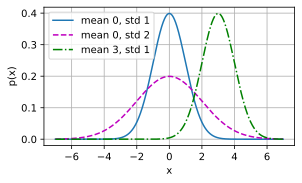

In [111]:
# 使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])
d2l.plt.show()

就像我们所看到的，改变均值会产生沿$x$轴的偏移，增加方差将会分散分布、降低其峰值。

均方误差损失函数（简称均方损失）可以用于线性回归的一个原因是： 我们假设了观测中包含噪声，其中噪声服从正态分布。 噪声正态分布如下式(其中，$\epsilon \sim \mathcal{N}(0, \sigma^2)$):

$$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon,$$

因此，我们现在可以写出通过给定的$\mathbf{X}$观测到特定$y$的似然(likelihood)
$$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right).$$
现在，根据极大似然估计法，参数$\mathbf{w}$和$b$的最优值是使整个数据集的似然最大的值：
$$P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).$$
根据极大似然估计法选择的估计量称为极大似然估计量。虽然使许多指数函数的乘积最大化看起来很困难，但是我们可以在不改变目标的前提下，通过最大似然对数来简化。最小化负对数似然$-\log P(\mathbf y \mid \mathbf X)$。由此可以得到的数学公式是：
$$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.$$

现在我们只需要假设$\sigma$是某个固定常数就可以忽略第一项， 因为第一项不依赖于$\mathbf{w}$和$b$。现在第二项除了常数$\frac{1}{\sigma^2}$外，其余部分和前面介绍的均方误差是一样的。 幸运的是，上面式子的解并不依赖于$\sigma$。 因此，在高斯噪声的假设下，最小化均方误差等价于对线性模型的极大似然估计。

### 小结
- 机器学习模型中的关键要素是训练数据、损失函数、优化算法，还有模型本身。
- 矢量化使数学表达上更简洁，同事运行的更快。
- 最小化目标函数和执行极大似然估计等价。
- 线性回归模型也是一个简单的神经网络。

## 线性回归的从零开始实现
在了解线性回归的关键思想之后，我们可以开始通过代码来动手实现线性回归了。 从零开始实现整个方法， 包括数据流水线、模型、损失函数和小批量随机梯度下降优化器。 虽然现代的深度学习框架几乎可以自动化地进行所有这些工作，但从零开始实现可以确保我们真正知道自己在做什么。 同时，了解更细致的工作原理将方便我们自定义模型、自定义层或自定义损失函数。 我们将只使用张量和自动求导。 在之后的章节中，我们会充分利用深度学习框架的优势，介绍更简洁的实现方式。

In [112]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### 生成数据集
使用线性模型参数$\mathbf{w} = [2, -3.4]^\top$和噪声项$\epsilon$生成数据集及其标签：
$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$$
$\epsilon$可以视为模型预测和标签时的潜在观测误差。在这里我们认为标准假设成立，即$\epsilon$服从均值为0的正态分布。为了简化问题，我们将标准差设为0.01。

In [113]:
def synthetic_data(w,b,num_examples): #@save
    """生成y=wx+b+噪声的模拟数据"""
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    return X, y.reshape((-1,1))

In [114]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,10000)

In [115]:
print(features[0],labels[0])

tensor([-0.1521,  0.9753]) tensor([0.5867])


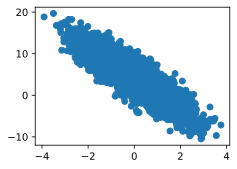

In [116]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy())
d2l.plt.show()

### 读取数据集
回想一下，训练模型时要对数据集进行遍历，每次抽取一小批量样本，并使用它们来更新我们的模型。 由于这个过程是训练机器学习算法的基础，所以有必要定义一个函数， 该函数能打乱数据集中的样本并以小批量方式获取数据。

在下面的代码中，我们定义一个data_iter函数， 该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量。 每个小批量包含一组特征和标签。

In [117]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [118]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.3832,  0.9994],
        [-1.0907, -0.2315],
        [-1.2586,  0.4806],
        [-2.2938,  0.2770],
        [-0.4555,  0.3901],
        [ 1.4434, -0.7588],
        [ 1.1814, -1.1170],
        [-0.0673,  0.5392],
        [ 0.7328, -1.4561],
        [ 0.6661,  0.3463]]) 
 tensor([[ 3.5669],
        [ 2.8131],
        [ 0.0412],
        [-1.3300],
        [ 1.9597],
        [ 9.6763],
        [10.3566],
        [ 2.2343],
        [10.6144],
        [ 4.3367]])


当我们运行迭代时，我们会连续地获得不同的小批量，直至遍历完整个数据集。 上面实现的迭代对教学来说很好，但它的执行效率很低，可能会在实际问题上陷入麻烦。 例如，它要求我们将所有数据加载到内存中，并执行大量的随机内存访问。 在深度学习框架中实现的内置迭代器效率要高得多， 它可以处理存储在文件中的数据和数据流提供的数据。

### 初始化模型参数
在我们开始用小批量随机梯度下降优化我们的模型参数之前， 我们需要先有一些参数。 在下面的代码中，我们通过从均值为0、标准差为0.01的正态分布中采样随机数来初始化权重， 并将偏置初始化为0。


In [119]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### 定义模型

In [120]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

### 定义损失函数

In [121]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 定义优化算法

在每一步中，使用从数据集中随机抽取的一个小批量，然后根据参数计算损失的梯度。 接下来，朝着减少损失的方向更新我们的参数。 下面的函数实现小批量随机梯度下降更新。 该函数接受模型参数集合、学习速率和批量大小作为输入。每 一步更新的大小由学习速率lr决定。 因为我们计算的损失是一个批量样本的总和，所以我们用批量大小（batch_size） 来规范化步长，这样步长大小就不会取决于我们对批量大小的选择。

In [122]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 训练

In [123]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

epoch 1, loss 0.000051
epoch 2, loss 0.000051
epoch 3, loss 0.000051
w的估计误差: tensor([0.0003, 0.0008], grad_fn=<SubBackward0>)
b的估计误差: tensor([4.7684e-05], grad_fn=<RsubBackward1>)


注意，我们不应该想当然地认为我们能够完美地求解参数。 在机器学习中，我们通常不太关心恢复真正的参数，而更关心如何高度准确预测参数。 幸运的是，即使是在复杂的优化问题上，随机梯度下降通常也能找到非常好的解。 其中一个原因是，在深度网络中存在许多参数组合能够实现高度精确的预测。

### 小结
- 我们学习了深度网络是如何实现和优化的。在这一过程中只使用张量和自动微分，不需要定义层或复杂的优化器。

- 这一节只触及到了表面知识。在下面的部分中，我们将基于刚刚介绍的概念描述其他模型，并学习如何更简洁地实现其他模型。

## 线性回归的简洁实现
### 生成数据集


In [124]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

### 读取数据集

In [125]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[-0.0911,  0.4382],
         [-0.4960,  1.7748],
         [-1.2423, -0.0354],
         [-1.3190, -0.7024],
         [ 1.6791, -1.0119],
         [-0.7855,  0.6401],
         [-1.1701, -0.2600],
         [-0.1730, -1.3744],
         [ 1.1573,  0.3099],
         [-0.2971,  1.1872]]),
 tensor([[ 2.5290],
         [-2.8321],
         [ 1.8417],
         [ 3.9396],
         [11.0115],
         [ 0.4306],
         [ 2.7415],
         [ 8.5198],
         [ 5.4619],
         [-0.4547]])]

### 定义模型

In [126]:
# nn是神经网络的缩写
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

### 初始化模型参数

In [127]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

### 定义损失函数
计算均方误差使用的是MSELoss类，也称为平方
范数。 默认情况下，它返回所有样本损失的平均值。

In [128]:
loss = nn.MSELoss()

### 定义优化算法
小批量随机梯度下降算法是一种优化神经网络的标准工具， PyTorch在optim模块中实现了该算法的许多变种。 当我们实例化一个SGD实例时，我们要指定优化的参数 （可通过net.parameters()从我们的模型中获得）以及优化算法所需的超参数字典。 小批量随机梯度下降只需要设置lr值，这里设置为0.03。

In [129]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

### 训练
通过深度学习框架的高级API来实现我们的模型只需要相对较少的代码。 我们不必单独分配参数、不必定义我们的损失函数，也不必手动实现小批量随机梯度下降。 当我们需要更复杂的模型时，高级API的优势将大大增加。 当我们有了所有的基本组件，训练过程代码与我们从零开始实现时所做的非常相似。

回顾一下：在每个迭代周期里，我们将完整遍历一次数据集（train_data）， 不停地从中获取一个小批量的输入和相应的标签。 对于每一个小批量，我们会进行以下步骤:

- 通过调用net(X)生成预测并计算损失l（前向传播）。

- 通过进行反向传播来计算梯度。

- 通过调用优化器来更新模型参数。

为了更好的衡量训练效果，我们计算每个迭代周期后的损失，并打印它来监控训练过程。

In [130]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000251
epoch 2, loss 0.000089
epoch 3, loss 0.000089


下面我们比较生成数据集的真实参数和通过有限数据训练获得的模型参数。 要访问参数，我们首先从net访问所需的层，然后读取该层的权重和偏置。 正如在从零开始实现中一样，我们估计得到的参数与生成数据的真实参数非常接近。

In [131]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([-0.0002,  0.0008])
b的估计误差： tensor([-0.0006])


### 小结
- 我们可以使用PyTorch的高级API更简洁地实现模型。

- 在PyTorch中，data模块提供了数据处理工具，nn模块定义了大量的神经网络层和常见损失函数。

- 我们可以通过_结尾的方法将参数替换，从而初始化参数。

## softmax回归
通常，机器学习实践者用分类这个词来描述两个有微妙差别的问题： 1. 我们只对样本的“硬性”类别感兴趣，即属于哪个类别； 2. 我们希望得到“软性”类别，即得到属于每个类别的概率。 这两者的界限往往很模糊。其中的一个原因是：即使我们只关心硬类别，我们仍然使用软类别的模型。

### 分类问题
我们从一个图像分类问题开始。 假设每次输入是一个$2\times2$的灰度图像。 我们可以用一个标量表示每个像素值，每个图像对应四个特征$x_1, x_2, x_3, x_4$。 此外，假设每个图像属于类别“猫”“鸡”和“狗”中的一个。

接下来，我们要选择如何表示标签。 我们有两个明显的选择：最直接的想法是选择$y \in \{1, 2, 3\}$， 其中整数分别代表$\{\text{狗}, \text{猫}, \text{鸡}\}$。 这是在计算机上存储此类信息的有效方法。 如果类别间有一些自然顺序， 比如说我们试图预测$\{\text{婴儿}, \text{儿童}, \text{青少年}, \text{青年人}, \text{中年人}, \text{老年人}\}$， 那么将这个问题转变为回归问题，并且保留这种格式是有意义的。

但是一般的分类问题并不与类别之间的自然顺序有关。 幸运的是，统计学家很早以前就发明了一种表示分类数据的简单方法：独热编码（one-hot encoding）。 独热编码是一个向量，它的分量和类别一样多。 类别对应的分量设置为1，其他所有分量设置为0。 在我们的例子中，标签将是一个三维向量， 其中$(1, 0, 0)$对应于“猫”、$(0, 1, 0)$对应于“鸡”、$(0, 0, 1)$对应于“狗”：
$$y \in \{(1, 0, 0), (0, 1, 0), (0, 0, 1)\}.$$


### 网络架构
为了估计所有可能类别的条件概率，我们需要一个有多个输出的模型，每个类别对应一个输出。 为了解决线性模型的分类问题，我们需要和输出一样多的仿射函数（affine function）。 每个输出对应于它自己的仿射函数。 在我们的例子中，由于我们有4个特征和3个可能的输出类别， 我们将需要12个标量来表示权重（带下标的$w$）， 3个标量来表示偏置（带下标的$b$）。 下面我们为每个输入计算三个未规范化的预测（logit）：$o_1$、$o_2$和$o_3$。
$$\begin{split}\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1,\\
o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2,\\
o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3.
\end{aligned}\end{split}$$

### 全连接层的参数开销
名思义，全连接层是“完全”连接的，可能有很多可学习的参数。 具体来说，对于任何具有$d$个输入和$q$个输出的全连接层， 参数开销为$\mathcal{O}(dq)$，这个数字在实践中可能高得令人望而却步。 幸运的是，将$d$个输入转换为$q$个输出的成本可以减少到$\mathcal{O}(\frac{dq}{n})$ ， 其中超参数$n$可以由我们灵活指定，以在实际应用中平衡参数节约和模型有效性。
### softmax运算

为了得到预测结果，我们将设置一个阈值，如选择具有最大概率的标签。

我们希望模型的输出$\hat{y_j}$可以视为属于类$j$的概率， 然后选择具有最大输出值的类别$\operatorname*{argmax}_j y_j$作为我们的预测。 例如，如果$\hat{y_1}$、$\hat{y_2}$和$\hat{y_3}$分别为0.1、0.8和0.1， 那么我们预测的类别是2，在我们的例子中代表“鸡”。

然而我们能否将未规范化的预测$o$
直接视作我们感兴趣的输出呢？ 答案是否定的。 因为将线性层的输出直接视为概率时存在一些问题： 一方面，我们没有限制这些输出数字的总和为1。 另一方面，根据输入的不同，它们可以为负值。

要将输出视为概率，我们必须保证在任何数据上的输出都是非负的且总和为1。 此外，我们需要一个训练的目标函数，来激励模型精准地估计概率。 例如， 在分类器输出0.5的所有样本中，我们希望这些样本是刚好有一半实际上属于预测的类别。 这个属性叫做校准（calibration）。

社会科学家邓肯·卢斯于1959年在选择模型（choice model）的理论基础上 发明的softmax函数正是这样做的： softmax函数能够将未规范化的预测变换为非负数并且总和为1，同时让模型保持 可导的性质。 为了完成这一目标，我们首先对每个未规范化的预测求幂，这样可以确保输出非负。 为了确保最终输出的概率值总和为1，我们再让每个求幂后的结果除以它们的总和。如下式：
$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o})\quad \text{其中}\quad \hat{y}_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$$

这里，对于所有的$j$总有$ 0 \leq \hat{y_j} \leq 1 $。 因此，$\hat{y}$可以视为一个正确的概率分布。 softmax运算不会改变未规范化的预测之间的大小次序，只会确定分配给每个类别的概率。 因此，在预测过程中，我们仍然可以用下式来选择最有可能的类别。

$$\operatorname*{argmax}_j \hat y_j = \operatorname*{argmax}_j o_j.$$

### 小批量样本的矢量化
为了提高计算效率并且充分利用GPU，我们通常会对小批量样本的数据执行矢量计算。 假设我们读取了一个批量的样本$\mathbf{x}$， 其中特征维度（输入数量）为$d$，批量大小为$n$。 此外，假设我们在输出中有$q$个类别。 那么小批量样本的特征为$\mathbf{x} \in \mathbb{R}^{n \times d}$， 权重为$\mathbf{W} \in \mathbb{R}^{d \times q}$， 偏置为$\mathbf{b} \in \mathbb{R}^{1 \times q}$。 softmax回归的矢量计算表达式为：
$$\begin{split}\begin{aligned} \mathbf{O} &= \mathbf{X} \mathbf{W} + \mathbf{b}, \\ \hat{\mathbf{Y}} & = \mathrm{softmax}(\mathbf{O}). \end{aligned}\end{split}$$

相对于一次处理一个样本， 小批量样本的矢量化加快了$\mathbf{X}$和$\mathbf{W}$的矩阵-向量乘法。 由于$\mathbf{X}$中的每一行代表一个数据样本， 那么softmax运算可以按行（rowwise）执行： 对于$mathbf{O}$的每一行，我们先对所有项进行幂运算，然后通过求和对它们进行标准化。 $\mathbf{X} \mathbf{W} + \mathbf{b}$ 的求和会使用广播机制， 小批量的未规范化预测$\mathbf{O}$和输出概率$\hat{\mathbf{Y}}$都是形状为$n \times q$的矩阵。

### 对数似然
我们需要一个损失函数来度量预测的效果。 我们将使用最大似然估计，这与在线性回归中的方法相同。
softmax函数给出了一个向量$\hat{y}$， 我们可以将其视为“对给定任意输入$mathbf{x}$的每个类的条件概率”。 例如，$P(y=\text{猫} \mid \mathbf{x})$。 假设整个数据集$\{\mathbf{X}, \mathbf{Y}\}$具有$n$个样本， 其中索引$i$的样本由特征向量$\mathbf{x}^{(i)}$和独热标签向量$\mathbf{y}^{(i)}$组成。 我们可以将估计值与实际值进行比较：
$$P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)}).$$

根据最大似然估计，我们最大化$P(\mathbf{Y} \mid \mathbf{X})$，相当于最小化负对数似然：
$$-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)}),$$
其中，对于任何标签$y$和模型预测$\hat{y}$，损失函数为：

$$l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j.$$
上式中的损失函数 通常被称为交叉熵损失（cross-entropy loss）。 由于$y$是一个长度为$q$的独热编码向量， 所以除了一个项以外的所有项$j$都消失了。 由于所有$\hat{y_j}$都是预测的概率，所以它们的对数永远不会大于$0$。 因此，如果正确地预测实际标签，即如果实际标签$P(\mathbf{y} \mid \mathbf{x})=1$， 则损失函数不能进一步最小化。 注意，这往往是不可能的。 例如，数据集中可能存在标签噪声（比如某些样本可能被误标）， 或输入特征没有足够的信息来完美地对每一个样本分类。
### softmax及其导数
由于softmax和相关的损失函数很常见， 因此我们需要更好地理解它的计算方式：
$$\begin{split}\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j\\
&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j.
\end{aligned}\end{split}$$
考虑相对于任何未规范化的预测$o_j$的导数，我们得到：
$$\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j.$$

换句话说，导数是我们softmax模型分配的概率与实际发生的情况（由独热标签向量表示）之间的差异。 从这个意义上讲，这与我们在回归中看到的非常相似， 其中梯度是观测值$y$和估计值$\hat{y}$之间的差异。

### 交叉熵

如果把熵$H(P)$想象为“知道真实概率的人所经历的惊异程度”，那么什么是交叉熵？ 交叉熵从$P$到$Q$，记为$H(P,Q)$。 我们可以把交叉熵想象为“主观概率为$Q$的观察者在看到根据概率$P$生成的数据时的预期惊异”。 当$P = Q$时，交叉熵达到最低。 在这种情况下，从$P$到$Q$的交叉熵是$H(P, P)= H(P)$。

简而言之，我们可以从两方面来考虑交叉熵分类目标： （i）最大化观测数据的似然；（ii）最小化传达标签所需的惊异。
### 小结
- softmax运算获取一个向量并将其映射为概率。

- softmax回归适用于分类问题，它使用了softmax运算中输出类别的概率分布。

- 交叉熵是一个衡量两个概率分布之间差异的很好的度量，它测量给定模型编码数据所需的比特数。

## 图像分类数据集
MNIST数据集是图像分类中广泛使用的数据集之一，但作为基准数据集过于简单。所以使用类似但更服战的Fashion-MNIST数据集。


In [132]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

### 读取数据集
我们可以通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中。


In [133]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0～1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
root="../data", train=False, transform=trans, download=True)

Fashion-MNIST由10个类别的图像组成， 每个类别由训练数据集（train dataset）中的6000张图像 和测试数据集（test dataset）中的1000张图像组成。 因此，训练集和测试集分别包含60000和10000张图像。 测试数据集不会用于训练，只用于评估模型性能。

In [134]:
len(mnist_train), len(mnist_test)

(60000, 10000)

每个输入图像的高度和宽度均为28像素。 数据集由灰度图像组成，其通道数为1。 为了简洁起见，本书将高度$h$像素、宽度$w$像素图像的形状记为$h \times w$或（$h,w$）。

In [135]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

Fashion-MNIST中包含的10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。 以下函数用于在数字标签索引及其文本名称之间进行转换。

In [136]:
def get_fashion_mnist_labels(labels):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [137]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

以下是训练数据集中前几个样本的图像及其相应的标签。

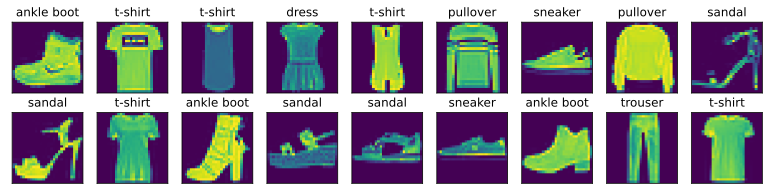

In [138]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

### 读取小批量
为了使我们在读取训练集和测试集时更容易，我们使用内置的数据迭代器，而不是从零开始创建。 回顾一下，在每次迭代中，数据加载器每次都会读取一小批量数据，大小为batch_size。 通过内置数据迭代器，我们可以随机打乱了所有样本，从而无偏见地读取小批量

In [139]:
batch_size = 256

def get_dataloader_workers():  #@save
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

In [140]:
# 测试读取训练数据时间
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'0.91 sec'

### 整合所有组件
现在我们定义load_data_fashion_mnist函数，用于获取和读取Fashion-MNIST数据集。 这个函数返回训练集和验证集的数据迭代器。 此外，这个函数还接受一个可选参数resize，用来将图像大小调整为另一种形状。

In [141]:
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

通过指定resize参数来测试load_data_fashion_mnist函数的图像大小调整功能。

In [142]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


### 小结
- Fashion-MNIST是一个服装分类数据集，由10个类别的图像组成。我们将在后续章节中使用此数据集来评估各种分类算法。

- 我们将高度$h$像素、宽度$w$像素图像的形状记为$h \times w$或（$h,w$）。

- 数据迭代器是获得更高性能的关键组件。依靠实现良好的数据迭代器，利用高性能计算来避免减慢训练过程。

## softmax回归从零开始实现
就像我们从零开始实现线性回归一样，我们认为softmax回归也是重要的基础，因此应该知道实现softmax回归的细节，我们将使用之前的Fashion-MNIST数据集，并设置数据迭代器的批量大小为256。
### 初始化模型参数
和之前线性回归例子一样，这里的每个样本都将用固定长度的向量表示。原始数据集中的每个样本都是28x28的图像，把他们看作长度为784的向量。在后面的学习中，我们将讨论能够利用图像空间结构的特征，但现在我们暂时只把每个像素位置看作一个特征。

回想一下，在softmax回归中，我们的输出与类别一样多。因为我们的数据集有10个类别，所以网络输出维度为10.因此，权重构成一个$784 \times 10$的矩阵，偏置将构成一个$1 \times 10$的行向量。与线性回归一样，我们将使用正态分布初始化我们的权重W,偏置初始化为0。

In [143]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [144]:
num_inputs = 784
num_outputs = 10
W = torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)
b = torch.zeros(num_outputs,requires_grad=True)

### 定义softmax操作
在实现softmax回归模型之前，我们简要回归一下sum运算符如何沿着张量中的特定维度工作。给定一个矩阵$\mathbf{X}$,我们可以对所有的元素求和，也可以只求同一轴上的元素，如果$\mathbf{X}$是一个形状为$(2 \times 3)$的张量，我们对列进行求和，则结果将是一个具有形状$(3,)$的向量。当调用sum运算符时，我们可以指定保持在原始张量的轴数，而不折叠求和的维度。浙江产生一个具有形状$(1, 3)$的二维张量。

In [145]:
X = torch.tensor([[1.0,2.0,3.0],[4.0,5.0,6.0]])
X.sum(0,keepdim=True),X.sum(1,keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

回想一下，实现softmax由三个步骤组成：

1. 对每个项求幂（使用exp）；

2. 对每一行求和（小批量中每个样本是一行），得到每个样本的规范化常数；

3. 将每一行除以其规范化常数，确保结果的和为1。

在查看代码之前，我们回顾一下这个表达式：
$$\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}.$$

分母或规范化常数，有时也称为配分函数（其对数称为对数-配分函数）。 该名称来自统计物理学中一个模拟粒子群分布的方程。

In [146]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

正如上述代码，对于任何随机输入，我们将每个元素变成一个非负数。 此外，依据概率原理，每行总和为1。

In [147]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.0182, 0.0048, 0.0711, 0.3474, 0.5586],
         [0.2182, 0.0454, 0.4428, 0.0169, 0.2767]]),
 tensor([1., 1.]))

注意，虽然这在数学上看起来是正确的，但我们在代码实现中有点草率。 矩阵中的非常大或非常小的元素可能造成数值上溢或下溢，但我们没有采取措施来防止这点。

### 定义模型
定义softmax操作后，我们可以实现softmax回归模型。 下面的代码定义了输入如何通过网络映射到输出。 注意，将数据传递到模型之前，我们使用reshape函数将每张原始图像展平为向量。

In [148]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

### 定义损失函数
接下来，我们实现交叉熵损失函数。 这可能是深度学习中最常见的损失函数，因为目前分类问题的数量远远超过回归问题的数量。

回顾一下，交叉熵采用真实标签的预测概率的负对数似然。 这里我们不使用Python的for循环迭代预测（这往往是低效的）， 而是通过一个运算符选择所有元素。 下面，我们创建一个数据样本y_hat，其中包含2个样本在3个类别的预测概率， 以及它们对应的标签y。 有了y，我们知道在第一个样本中，第一类是正确的预测； 而在第二个样本中，第三类是正确的预测。 然后使用y作为y_hat中概率的索引， 我们选择第一个样本中第一个类的概率和第二个样本中第三个类的概率。

In [149]:
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]])
y_hat[[0,1],y]  # 参数为索引，返回对应索引的元素，第一个为行索引，第二个为列索引

tensor([0.1000, 0.5000])

In [167]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

### 分类精度
给定预测概率分布y_hat，当我们必须输出硬预测（hard prediction）时， 我们通常选择预测概率最高的类。 许多应用都要求我们做出选择。如Gmail必须将电子邮件分类为“Primary（主要邮件）”、 “Social（社交邮件）”“Updates（更新邮件）”或“Forums（论坛邮件）”。 Gmail做分类时可能在内部估计概率，但最终它必须在类中选择一个。

当预测与标签分类y一致时，即是正确的。 分类精度即正确预测数量与总预测数量之比。 虽然直接优化精度可能很困难（因为精度的计算不可导）， 但精度通常是我们最关心的性能衡量标准，我们在训练分类器时几乎总会关注它。

为了计算精度，我们执行以下操作。 首先，如果y_hat是矩阵，那么假定第二个维度存储每个类的预测分数。 我们使用argmax获得每行中最大元素的索引来获得预测类别。 然后我们将预测类别与真实y元素进行比较。 由于等式运算符“==”对数据类型很敏感， 因此我们将y_hat的数据类型转换为与y的数据类型一致。 结果是一个包含0（错）和1（对）的张量。 最后，我们求和会得到正确预测的数量。

In [150]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1) # 得到axis=1轴上最大值的索引
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

我们将继续使用之前定义的变量y_hat和y分别作为预测的概率分布和标签。 可以看到，第一个样本的预测类别是2（该行的最大元素为0.6，索引为2），这与实际标签0不一致。 第二个样本的预测类别是2（该行的最大元素为0.5，索引为2），这与实际标签2一致。 因此，这两个样本的分类精度率为0.5。

In [151]:
accuracy(y_hat, y) / len(y)

0.5

同样，对于任意数据迭代器data_iter可访问的数据集， 我们可以评估在任意模型net的精度。

In [152]:
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

这里定义一个实用程序类Accumulator，用于对多个变量进行累加。 在上面的evaluate_accuracy函数中， 我们在Accumulator实例中创建了2个变量， 分别用于存储正确预测的数量和预测的总数量。 当我们遍历数据集时，两者都将随着时间的推移而累加。

In [153]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

由于我们使用随机权重初始化net模型， 因此该模型的精度应接近于随机猜测。 例如在有10个类别情况下的精度为0.1。

In [154]:
evaluate_accuracy(net, test_iter)

0.0954

### 训练
在我们做过的线性回归实现， softmax回归的训练过程代码应该看起来非常眼熟。 在这里，我们重构训练过程的实现以使其可重复使用。 首先，我们定义一个函数来训练一个迭代周期。 请注意，updater是更新模型参数的常用函数，它接受批量大小作为参数。 它可以是d2l.sgd函数，也可以是框架的内置优化函数。

In [155]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

在展示训练函数的实现之前，我们定义一个在动画中绘制数据的实用程序类Animator， 它能够简化本书其余部分的代码。

In [156]:
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

接下来我们实现一个训练函数， 它会在train_iter访问到的训练数据集上训练一个模型net。 该训练函数将会运行多个迭代周期（由num_epochs指定）。 在每个迭代周期结束时，利用test_iter访问到的测试数据集对模型进行评估。 我们将利用Animator类来可视化训练进度。

In [162]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

作为一个从零开始的实现，我们使用小批量随机梯度下降来优化模型的损失函数，设置学习率为0.1。

In [158]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

现在，我们训练模型10个迭代周期。 请注意，迭代周期（num_epochs）和学习率（lr）都是可调节的超参数。 通过更改它们的值，我们可以提高模型的分类精度。

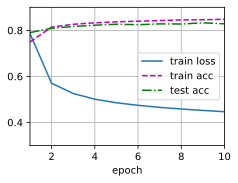

In [168]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

### 预测
现在训练已经完成，我们的模型已经准备好对图像进行分类预测。 给定一系列图像，我们将比较它们的实际标签（文本输出的第一行）和模型预测（文本输出的第二行）。


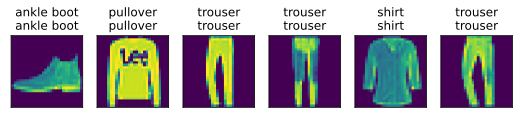

In [169]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

### 小结
- 借助softmax回归，我们可以训练多分类的模型。

- 训练softmax回归循环模型与训练线性回归模型非常相似：先读取数据，再定义模型和损失函数，然后使用优化算法训练模型。大多数常见的深度学习模型都有类似的训练过程。

# softmax回归的简洁实现

我们发现通过深度学习框架的高级API能够使实现线性回归变得更加容易。 同样，通过深度学习框架的高级API也能更方便地实现softmax回归模型。 继续使用Fashion-MNIST数据集，并保持批量大小为256。


In [9]:
import torch
from torch import nn
from d2l import torch as d2l

In [10]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 初始化模型参数

 softmax回归的输出层是一个全连接层。 因此，为了实现我们的模型， 我们只需在Sequential中添加一个带有10个输出的全连接层。 同样，在这里Sequential并不是必要的， 但它是实现深度模型的基础。 我们仍然以均值0和标准差0.01随机初始化权重。

In [11]:
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

## 重新审视Softmax的实现

在前面我们计算了模型的输出，然后将此输出送入交叉熵损失。
从数学上讲，这是一件完全合理的事情。
然而，从计算角度来看，指数可能会造成数值稳定性问题。

回想一下，softmax函数$\hat y_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$，
其中$\hat y_j$是预测的概率分布。
$o_j$是未规范化的预测$\mathbf{o}$的第$j$个元素。
如果$o_k$中的一些数值非常大，
那么$\exp(o_k)$可能大于数据类型容许的最大数字，即*上溢*（overflow）。
这将使分母或分子变为`inf`（无穷大），
最后得到的是0、`inf`或`nan`（不是数字）的$\hat y_j$。
在这些情况下，我们无法得到一个明确定义的交叉熵值。

解决这个问题的一个技巧是：
在继续softmax计算之前，先从所有$o_k$中减去$\max(o_k)$。
这里可以看到每个$o_k$按常数进行的移动不会改变softmax的返回值：

$$
\begin{aligned}
\hat y_j & =  \frac{\exp(o_j - \max(o_k))\exp(\max(o_k))}{\sum_k \exp(o_k - \max(o_k))\exp(\max(o_k))} \\
& = \frac{\exp(o_j - \max(o_k))}{\sum_k \exp(o_k - \max(o_k))}.
\end{aligned}
$$


在减法和规范化步骤之后，可能有些$o_j - \max(o_k)$具有较大的负值。
由于精度受限，$\exp(o_j - \max(o_k))$将有接近零的值，即*下溢*（underflow）。
这些值可能会四舍五入为零，使$\hat y_j$为零，
并且使得$\log(\hat y_j)$的值为`-inf`。
反向传播几步后，我们可能会发现自己面对一屏幕可怕的`nan`结果。

尽管我们要计算指数函数，但我们最终在计算交叉熵损失时会取它们的对数。
通过将softmax和交叉熵结合在一起，可以避免反向传播过程中可能会困扰我们的数值稳定性问题。
如下面的等式所示，我们避免计算$\exp(o_j - \max(o_k))$，
而可以直接使用$o_j - \max(o_k)$，因为$\log(\exp(\cdot))$被抵消了。

$$
\begin{aligned}
\log{(\hat y_j)} & = \log\left( \frac{\exp(o_j - \max(o_k))}{\sum_k \exp(o_k - \max(o_k))}\right) \\
& = \log{(\exp(o_j - \max(o_k)))}-\log{\left( \sum_k \exp(o_k - \max(o_k)) \right)} \\
& = o_j - \max(o_k) -\log{\left( \sum_k \exp(o_k - \max(o_k)) \right)}.
\end{aligned}
$$

我们也希望保留传统的softmax函数，以备我们需要评估通过模型输出的概率。
但是，我们没有将softmax概率传递到损失函数中，
而是在交叉熵损失函数中传递未规范化的预测，并同时计算softmax及其对数，
这是一种类似LogSumExp技巧的聪明方式。


In [12]:
loss = nn.CrossEntropyLoss(reduction='none')

### 优化算法
在这里，我们使用学习率为0.1的小批量随机梯度下降作为优化算法。 这与我们在线性回归例子中的相同，这说明了优化器的普适性。

In [13]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

### 训练
接下来我们调用在之前所定义的训练函数来训练模型。

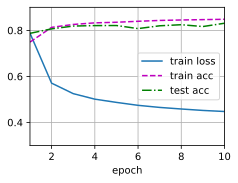

In [14]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

和以前一样，这个算法使结果收敛到一个相当高的精度，而且这次的代码比之前更精简了。

### 小结
- 使用深度学习框架的高级API，我们可以更简洁地实现softmax回归。

- 从计算的角度来看，实现softmax回归比较复杂。在许多情况下，深度学习框架在这些著名的技巧之外采取了额外的预防措施，来确保数值的稳定性。这使我们避免了在实践中从零开始编写模型时可能遇到的陷阱。

## 多层感知机
我们介绍了softmax回归
然后我们从零开始实现了softmax回归
接着使用高级API实现了算法
并训练分类器从低分辨率图像中识别10类服装。
在这个过程中，我们学习了如何处理数据，如何将输出转换为有效的概率分布，
并应用适当的损失函数，根据模型参数最小化损失。
我们已经在简单的线性模型背景下掌握了这些知识，
现在我们可以开始对深度神经网络的探索，这也是本书主要涉及的一类模型。

### 隐藏层

仿射变换，
它是一种带有偏置项的线性变换。
首先，回想一下如 中所示的softmax回归的模型架构。
该模型通过单个仿射变换将我们的输入直接映射到输出，然后进行softmax操作。
如果我们的标签通过仿射变换后确实与我们的输入数据相关，那么这种方法确实足够了。
但是，仿射变换中的*线性*是一个很强的假设。

### 线性模型可能会出错

例如，线性意味着*单调*假设：
任何特征的增大都会导致模型输出的增大（如果对应的权重为正），
或者导致模型输出的减小（如果对应的权重为负）。
有时这是有道理的。
例如，如果我们试图预测一个人是否会偿还贷款。
我们可以认为，在其他条件不变的情况下，
收入较高的申请人比收入较低的申请人更有可能偿还贷款。
但是，虽然收入与还款概率存在单调性，但它们不是线性相关的。
收入从0增加到5万，可能比从100万增加到105万带来更大的还款可能性。
处理这一问题的一种方法是对我们的数据进行预处理，
使线性变得更合理，如使用收入的对数作为我们的特征。

然而我们可以很容易找出违反单调性的例子。
例如，我们想要根据体温预测死亡率。
对体温高于37摄氏度的人来说，温度越高风险越大。
然而，对体温低于37摄氏度的人来说，温度越高风险就越低。
在这种情况下，我们也可以通过一些巧妙的预处理来解决问题。
例如，我们可以使用与37摄氏度的距离作为特征。

但是，如何对猫和狗的图像进行分类呢？
增加位置$(13, 17)$处像素的强度是否总是增加（或降低）图像描绘狗的似然？
对线性模型的依赖对应于一个隐含的假设，
即区分猫和狗的唯一要求是评估单个像素的强度。
在一个倒置图像后依然保留类别的世界里，这种方法注定会失败。

与我们前面的例子相比，这里的线性很荒谬，
而且我们难以通过简单的预处理来解决这个问题。
这是因为任何像素的重要性都以复杂的方式取决于该像素的上下文（周围像素的值）。
我们的数据可能会有一种表示，这种表示会考虑到我们在特征之间的相关交互作用。
在此表示的基础上建立一个线性模型可能会是合适的，
但我们不知道如何手动计算这么一种表示。
对于深度神经网络，我们使用观测数据来联合学习隐藏层表示和应用于该表示的线性预测器。

### 在网络中加入隐藏层

我们可以通过在网络中加入一个或多个隐藏层来克服线性模型的限制，
使其能处理更普遍的函数关系类型。
要做到这一点，最简单的方法是将许多全连接层堆叠在一起。
每一层都输出到上面的层，直到生成最后的输出。
我们可以把前$L-1$层看作表示，把最后一层看作线性预测器。
这种架构通常称为*多层感知机*（multilayer perceptron），通常缩写为*MLP*。
下面，我们以图的方式描述了多层感知机。
一个单隐藏层的多层感知机，具有5个隐藏单元

这个多层感知机有4个输入，3个输出，其隐藏层包含5个隐藏单元。
输入层不涉及任何计算，因此使用此网络产生输出只需要实现隐藏层和输出层的计算。
因此，这个多层感知机中的层数为2。
注意，这两个层都是全连接的。
每个输入都会影响隐藏层中的每个神经元，
而隐藏层中的每个神经元又会影响输出层中的每个神经元。

然而，
具有全连接层的多层感知机的参数开销可能会高得令人望而却步。
即使在不改变输入或输出大小的情况下，
可能在参数节约和模型有效性之间进行权衡 
![](https://zh.d2l.ai/_images/mlp.svg)
### 从线性到非线性

同之前的章节一样，
我们通过矩阵$\mathbf{X} \in \mathbb{R}^{n \times d}$
来表示$n$个样本的小批量，
其中每个样本具有$d$个输入特征。
对于具有$h$个隐藏单元的单隐藏层多层感知机，
用$\mathbf{H} \in \mathbb{R}^{n \times h}$表示隐藏层的输出，
称为*隐藏表示*（hidden representations）。
在数学或代码中，$\mathbf{H}$也被称为*隐藏层变量*（hidden-layer variable）
或*隐藏变量*（hidden variable）。
因为隐藏层和输出层都是全连接的，
所以我们有隐藏层权重$\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$
和隐藏层偏置$\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$
以及输出层权重$\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$
和输出层偏置$\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$。
形式上，我们按如下方式计算单隐藏层多层感知机的输出
$\mathbf{O} \in \mathbb{R}^{n \times q}$：

$$
\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}
$$

注意在添加隐藏层之后，模型现在需要跟踪和更新额外的参数。
可我们能从中得到什么好处呢？在上面定义的模型里，我们没有好处！
原因很简单：上面的隐藏单元由输入的仿射函数给出，
而输出（softmax操作前）只是隐藏单元的仿射函数。
仿射函数的仿射函数本身就是仿射函数，
但是我们之前的线性模型已经能够表示任何仿射函数。

我们可以证明这一等价性，即对于任意权重值，
我们只需合并隐藏层，便可产生具有参数
$\mathbf{W} = \mathbf{W}^{(1)}\mathbf{W}^{(2)}$
和$\mathbf{b} = \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}$
的等价单层模型：

$$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$$

为了发挥多层架构的潜力，
我们还需要一个额外的关键要素：
在仿射变换之后对每个隐藏单元应用非线性的*激活函数*（activation function）$\sigma$。
激活函数的输出（例如，$\sigma(\cdot)$）被称为*活性值*（activations）。
一般来说，有了激活函数，就不可能再将我们的多层感知机退化成线性模型：

$$
\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}
$$

由于$\mathbf{X}$中的每一行对应于小批量中的一个样本，
出于记号习惯的考量，
我们定义非线性函数$\sigma$也以按行的方式作用于其输入，
即一次计算一个样本。
之前以相同的方式使用了softmax符号来表示按行操作。
但是本节应用于隐藏层的激活函数通常不仅按行操作，也按元素操作。
这意味着在计算每一层的线性部分之后，我们可以计算每个活性值，
而不需要查看其他隐藏单元所取的值。对于大多数激活函数都是这样。

为了构建更通用的多层感知机，
我们可以继续堆叠这样的隐藏层，
例如$\mathbf{H}^{(1)} = \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$和$\mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$，
一层叠一层，从而产生更有表达能力的模型。

### 通用近似定理

多层感知机可以通过隐藏神经元，捕捉到输入之间复杂的相互作用，
这些神经元依赖于每个输入的值。
我们可以很容易地设计隐藏节点来执行任意计算。
例如，在一对输入上进行基本逻辑操作，多层感知机是通用近似器。
即使是网络只有一个隐藏层，给定足够的神经元和正确的权重，
我们可以对任意函数建模，尽管实际中学习该函数是很困难的。
神经网络有点像C语言。
C语言和任何其他现代编程语言一样，能够表达任何可计算的程序。
但实际上，想出一个符合规范的程序才是最困难的部分。

而且，虽然一个单隐层网络能学习任何函数，
但并不意味着我们应该尝试使用单隐藏层网络来解决所有问题。
事实上，通过使用更深（而不是更广）的网络，我们可以更容易地逼近许多函数。
我们将在后面的章节中进行更细致的讨论。

### 激活函数

*激活函数*（activation function）通过计算加权和并加上偏置来确定神经元是否应该被激活，
它们将输入信号转换为输出的可微运算。
大多数激活函数都是非线性的。
由于激活函数是深度学习的基础，下面简要介绍一些常见的激活函数。


In [5]:
%matplotlib inline
import torch
from d2l import torch as d2l

### ReLU函数

最受欢迎的激活函数是*修正线性单元*（Rectified linear unit，*ReLU*），
因为它实现简单，同时在各种预测任务中表现良好。
ReLU提供了一种非常简单的非线性变换。
给定元素$x$，ReLU函数被定义为该元素与$0$的最大值：

(**$$\operatorname{ReLU}(x) = \max(x, 0).$$**)

通俗地说，ReLU函数通过将相应的活性值设为0，仅保留正元素并丢弃所有负元素。
为了直观感受一下，我们可以画出函数的曲线图。
正如从图中所看到，激活函数是分段线性的。


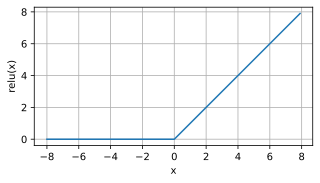

In [6]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

当输入为负时，ReLU函数的导数为0，而当输入为正时，ReLU函数的导数为1。
注意，当输入值精确等于0时，ReLU函数不可导。
在此时，我们默认使用左侧的导数，即当输入为0时导数为0。
我们可以忽略这种情况，因为输入可能永远都不会是0。
这里引用一句古老的谚语，“如果微妙的边界条件很重要，我们很可能是在研究数学而非工程”，
这个观点正好适用于这里。
下面我们绘制ReLU函数的导数。


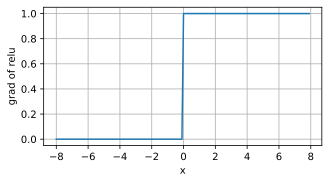

In [7]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

使用ReLU的原因是，它求导表现得特别好：要么让参数消失，要么让参数通过。
这使得优化表现得更好，并且ReLU减轻了困扰以往神经网络的梯度消失问题（稍后将详细介绍）。

注意，ReLU函数有许多变体，包括*参数化ReLU*（Parameterized ReLU，*pReLU*）
函数。
该变体为ReLU添加了一个线性项，因此即使参数是负的，某些信息仍然可以通过：

$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

### sigmoid函数

对于一个定义域在$\mathbb{R}$中的输入，
*sigmoid函数*将输入变换为区间(0, 1)上的输出。
因此，sigmoid通常称为*挤压函数*（squashing function）：
它将范围（-inf, inf）中的任意输入压缩到区间（0, 1）中的某个值：

(**$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$**)

在最早的神经网络中，科学家们感兴趣的是对“激发”或“不激发”的生物神经元进行建模。
因此，这一领域的先驱可以一直追溯到人工神经元的发明者麦卡洛克和皮茨，他们专注于阈值单元。
阈值单元在其输入低于某个阈值时取值0，当输入超过阈值时取值1。

当人们逐渐关注到到基于梯度的学习时，
sigmoid函数是一个自然的选择，因为它是一个平滑的、可微的阈值单元近似。
当我们想要将输出视作二元分类问题的概率时，
sigmoid仍然被广泛用作输出单元上的激活函数
（sigmoid可以视为softmax的特例）。
然而，sigmoid在隐藏层中已经较少使用，
它在大部分时候被更简单、更容易训练的ReLU所取代。
在后面关于循环神经网络的章节中，我们将描述利用sigmoid单元来控制时序信息流的架构。

下面，我们绘制sigmoid函数。
注意，当输入接近0时，sigmoid函数接近线性变换。


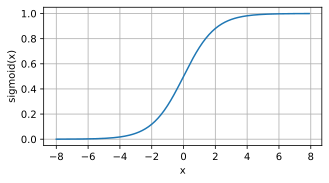

In [9]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

sigmoid函数的导数为下面的公式：

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

sigmoid函数的导数图像如下所示。
注意，当输入为0时，sigmoid函数的导数达到最大值0.25；
而输入在任一方向上越远离0点时，导数越接近0。


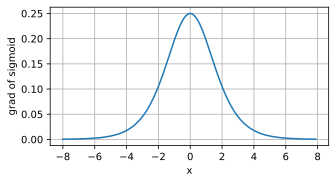

In [10]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

### tanh函数

与sigmoid函数类似，
[**tanh(双曲正切)函数也能将其输入压缩转换到区间(-1, 1)上**]。
tanh函数的公式如下：

(**$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$**)

下面我们绘制tanh函数。
注意，当输入在0附近时，tanh函数接近线性变换。
函数的形状类似于sigmoid函数，
不同的是tanh函数关于坐标系原点中心对称。


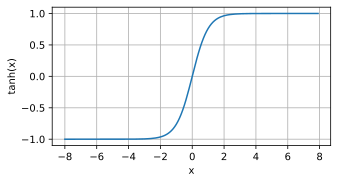

In [11]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

tanh函数的导数是：

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

tanh函数的导数图像如下所示。
当输入接近0时，tanh函数的导数接近最大值1。
与我们在sigmoid函数图像中看到的类似，
输入在任一方向上越远离0点，导数越接近0。


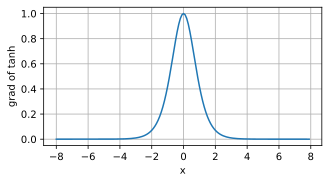

In [12]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

总结一下，我们现在了解了如何结合非线性函数来构建具有更强表达能力的多层神经网络架构。
顺便说一句，这些知识已经让你掌握了一个类似于1990年左右深度学习从业者的工具。
在某些方面，你比在20世纪90年代工作的任何人都有优势，
因为你可以利用功能强大的开源深度学习框架，只需几行代码就可以快速构建模型，
而以前训练这些网络需要研究人员编写数千行的C或Fortran代码。

### 小结

* 多层感知机在输出层和输入层之间增加一个或多个全连接隐藏层，并通过激活函数转换隐藏层的输出。
* 常用的激活函数包括ReLU函数、sigmoid函数和tanh函数。

### 练习

1. 计算pReLU激活函数的导数。
1. 证明一个仅使用ReLU（或pReLU）的多层感知机构造了一个连续的分段线性函数。
1. 证明$\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$。
1. 假设我们有一个非线性单元，将它一次应用于一个小批量的数据。这会导致什么样的问题？


## 多层感知机的从零开始实现
我们已经在上面描述了多层感知机（MLP）， 现在让我们尝试自己实现一个多层感知机。 为了与之前softmax回归获得的结果进行比较， 我们将继续使用Fashion-MNIST图像分类数据集。

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 初始化模型参数
回想一下，Fashion-MNIST中的每个图像由 $28 \times 28 = 784$
个灰度像素值组成。 所有图像共分为10个类别。 忽略像素之间的空间结构， 我们可以将每个图像视为具有784个输入特征 和10个类的简单分类数据集。 首先，我们将实现一个具有单隐藏层的多层感知机， 它包含256个隐藏单元。 注意，我们可以将这两个变量都视为超参数。 通常，我们选择2的若干次幂作为层的宽度。 因为内存在硬件中的分配和寻址方式，这么做往往可以在计算上更高效。

我们用几个张量来表示我们的参数。 注意，对于每一层我们都要记录一个权重矩阵和一个偏置向量。 跟以前一样，我们要为损失关于这些参数的梯度分配内存。

In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

### 激活函数
为了确保我们对模型的细节了如指掌， 我们将实现ReLU激活函数， 而不是直接调用内置的relu函数。

In [3]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

### 模型
因为我们忽略了空间结构， 所以我们使用reshape将每个二维图像转换为一个长度为num_inputs的向量。 只需几行代码就可以实现我们的模型。

In [4]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

### 损失函数
由于我们已经从零实现过softmax函数， 因此在这里我们直接使用高级API中的内置函数来计算softmax和交叉熵损失。 回想一下我们之前 对这些复杂问题的讨论。 我们鼓励感兴趣的读者查看损失函数的源代码，以加深对实现细节的了解。

In [5]:
loss = nn.CrossEntropyLoss(reduction='none')

### 训练
幸运的是，多层感知机的训练过程与softmax回归的训练过程完全相同。 可以直接调用d2l包的train_ch3函数， 将迭代周期数设置为10，并将学习率设置为0.1.

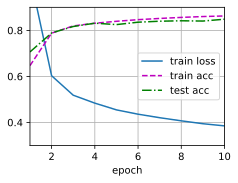

In [6]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

为了对学习到的模型进行评估，我们将在一些测试数据上应用这个模型。

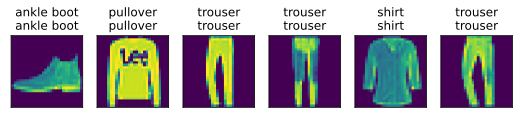

In [7]:
d2l.predict_ch3(net, test_iter)

### 小结
- 手动实现一个简单的多层感知机是很容易的。然而如果有大量的层，从零开始实现多层感知机会变得很麻烦（例如，要命名和记录模型的参数）。

## 模型选择、欠拟合和过拟合
作为机器学习科学家，我们的目标是发现模式（pattern）。 但是，我们如何才能确定模型是真正发现了一种泛化的模式， 而不是简单地记住了数据呢？ 例如，我们想要在患者的基因数据与痴呆状态之间寻找模式， 其中标签是从集合痴呆轻度认知障碍健康
中提取的。 因为基因可以唯一确定每个个体（不考虑双胞胎）， 所以在这个任务中是有可能记住整个数据集的。

我们不想让模型只会做这样的事情：“那是鲍勃！我记得他！他有痴呆症！”。 原因很简单：当我们将来部署该模型时，模型需要判断从未见过的患者。 只有当模型真正发现了一种泛化模式时，才会作出有效的预测。

更正式地说，我们的目标是发现某些模式， 这些模式捕捉到了我们训练集潜在总体的规律。 如果成功做到了这点，即使是对以前从未遇到过的个体， 模型也可以成功地评估风险。 如何发现可以泛化的模式是机器学习的根本问题。

困难在于，当我们训练模型时，我们只能访问数据中的小部分样本。 最大的公开图像数据集包含大约一百万张图像。 而在大部分时候，我们只能从数千或数万个数据样本中学习。 在大型医院系统中，我们可能会访问数十万份医疗记录。 当我们使用有限的样本时，可能会遇到这样的问题： 当收集到更多的数据时，会发现之前找到的明显关系并不成立。

将模型在训练数据上拟合的比在潜在分布中更接近的现象称为过拟合（overfitting）， 用于对抗过拟合的技术称为正则化（regularization）。 在前面的章节中，有些读者可能在用Fashion-MNIST数据集做实验时已经观察到了这种过拟合现象。 在实验中调整模型架构或超参数时会发现： 如果有足够多的神经元、层数和训练迭代周期， 模型最终可以在训练集上达到完美的精度，此时测试集的准确性却下降了。


### 训练误差和泛化误差
为了进一步讨论这一现象，我们需要了解训练误差和泛化误差。 训练误差（training error）是指， 模型在训练数据集上计算得到的误差。 泛化误差（generalization error）是指， 模型应用在同样从原始样本的分布中抽取的无限多数据样本时，模型误差的期望。

问题是，我们永远不能准确地计算出泛化误差。 这是因为无限多的数据样本是一个虚构的对象。 在实际中，我们只能通过将模型应用于一个独立的测试集来估计泛化误差， 该测试集由随机选取的、未曾在训练集中出现的数据样本构成。

下面的三个思维实验将有助于更好地说明这种情况。 假设一个大学生正在努力准备期末考试。 一个勤奋的学生会努力做好练习，并利用往年的考试题目来测试自己的能力。 尽管如此，在过去的考试题目上取得好成绩并不能保证他会在真正考试时发挥出色。 例如，学生可能试图通过死记硬背考题的答案来做准备。 他甚至可以完全记住过去考试的答案。 另一名学生可能会通过试图理解给出某些答案的原因来做准备。 在大多数情况下，后者会考得更好。

类似地，考虑一个简单地使用查表法来回答问题的模型。 如果允许的输入集合是离散的并且相当小， 那么也许在查看许多训练样本后，该方法将执行得很好。 但当这个模型面对从未见过的例子时，它表现的可能比随机猜测好不到哪去。 这是因为输入空间太大了，远远不可能记住每一个可能的输入所对应的答案。 例如，考虑$28\times28$
的灰度图像。 如果每个像素可以取$256$
个灰度值中的一个， 则有$256^{784}$
个可能的图像。 这意味着指甲大小的低分辨率灰度图像的数量比宇宙中的原子要多得多。 即使我们可能遇到这样的数据，我们也不可能存储整个查找表。

最后，考虑对掷硬币的结果（类别0：正面，类别1：反面）进行分类的问题。 假设硬币是公平的，无论我们想出什么算法，泛化误差始终是$\frac {1}{2}$
 
。 然而，对于大多数算法，我们应该期望训练误差会更低（取决于运气）。 考虑数据集{0，1，1，1，0，1}。 我们的算法不需要额外的特征，将倾向于总是预测多数类， 从我们有限的样本来看，它似乎是1占主流。 在这种情况下，总是预测类1的模型将产生$\frac {1}{3}$
 
的误差， 这比我们的泛化误差要好得多。 当我们逐渐增加数据量，正面比例明显偏离$\frac {1}{2}$
 
的可能性将会降低， 我们的训练误差将与泛化误差相匹配。

### 统计学理论
由于泛化是机器学习中的基本问题， 许多数学家和理论家毕生致力于研究描述这一现象的形式理论。 在同名定理（eponymous theorem）中， 格里文科和坎特利推导出了训练误差收敛到泛化误差的速率。 在一系列开创性的论文中， Vapnik和Chervonenkis 将这一理论扩展到更一般种类的函数。 这项工作为统计学习理论奠定了基础。

在我们目前已探讨、并将在之后继续探讨的监督学习情景中， 我们假设训练数据和测试数据都是从相同的分布中独立提取的。 这通常被称为独立同分布假设（i.i.d. assumption）， 这意味着对数据进行采样的过程没有进行“记忆”。 换句话说，抽取的第2个样本和第3个样本的相关性， 并不比抽取的第2个样本和第200万个样本的相关性更强。

要成为一名优秀的机器学习科学家需要具备批判性思考能力。 假设是存在漏洞的，即很容易找出假设失效的情况。 如果我们根据从加州大学旧金山分校医学中心的患者数据训练死亡风险预测模型， 并将其应用于马萨诸塞州综合医院的患者数据，结果会怎么样？ 这两个数据的分布可能不完全一样。 此外，抽样过程可能与时间有关。 比如当我们对微博的主题进行分类时， 新闻周期会使得正在讨论的话题产生时间依赖性，从而违反独立性假设。

有时候我们即使轻微违背独立同分布假设，模型仍将继续运行得非常好。 比如，我们有许多有用的工具已经应用于现实，如人脸识别、语音识别和语言翻译。 毕竟，几乎所有现实的应用都至少涉及到一些违背独立同分布假设的情况。

有些违背独立同分布假设的行为肯定会带来麻烦。 比如，我们试图只用来自大学生的人脸数据来训练一个人脸识别系统， 然后想要用它来监测疗养院中的老人。 这不太可能有效，因为大学生看起来往往与老年人有很大的不同。

在接下来的章节中，我们将讨论因违背独立同分布假设而引起的问题。 目前，即使认为独立同分布假设是理所当然的，理解泛化性也是一个困难的问题。 此外，能够解释深层神经网络泛化性能的理论基础， 也仍在继续困扰着学习理论领域最伟大的学者们。

当我们训练模型时，我们试图找到一个能够尽可能拟合训练数据的函数。 但是如果它执行地“太好了”，而不能对看不见的数据做到很好泛化，就会导致过拟合。 这种情况正是我们想要避免或控制的。 深度学习中有许多启发式的技术旨在防止过拟合。

### 模型复杂性
当我们有简单的模型和大量的数据时，我们期望泛化误差与训练误差相近。 当我们有更复杂的模型和更少的样本时，我们预计训练误差会下降，但泛化误差会增大。 模型复杂性由什么构成是一个复杂的问题。 一个模型是否能很好地泛化取决于很多因素。 例如，具有更多参数的模型可能被认为更复杂， 参数有更大取值范围的模型可能更为复杂。 通常对于神经网络，我们认为需要更多训练迭代的模型比较复杂， 而需要早停（early stopping）的模型（即较少训练迭代周期）就不那么复杂。

我们很难比较本质上不同大类的模型之间（例如，决策树与神经网络）的复杂性。 就目前而言，一条简单的经验法则相当有用： 统计学家认为，能够轻松解释任意事实的模型是复杂的， 而表达能力有限但仍能很好地解释数据的模型可能更有现实用途。 在哲学上，这与波普尔的科学理论的可证伪性标准密切相关： 如果一个理论能拟合数据，且有具体的测试可以用来证明它是错误的，那么它就是好的。 这一点很重要，因为所有的统计估计都是事后归纳。 也就是说，我们在观察事实之后进行估计，因此容易受到相关谬误的影响。 目前，我们将把哲学放在一边，坚持更切实的问题。

本节为了给出一些直观的印象，我们将重点介绍几个倾向于影响模型泛化的因素。

1. 可调整参数的数量。当可调整参数的数量（有时称为自由度）很大时，模型往往更容易过拟合。

2. 参数采用的值。当权重的取值范围较大时，模型可能更容易过拟合。

3. 训练样本的数量。即使模型很简单，也很容易过拟合只包含一两个样本的数据集。而过拟合一个有数百万个样本的数据集则需要一个极其灵活的模型。

### 模型选择
在机器学习中，我们通常在评估几个候选模型后选择最终的模型。 这个过程叫做模型选择。 有时，需要进行比较的模型在本质上是完全不同的（比如，决策树与线性模型）。 又有时，我们需要比较不同的超参数设置下的同一类模型。

例如，训练多层感知机模型时，我们可能希望比较具有 不同数量的隐藏层、不同数量的隐藏单元以及不同的激活函数组合的模型。 为了确定候选模型中的最佳模型，我们通常会使用验证集。

### 验证集
原则上，在我们确定所有的超参数之前，我们不希望用到测试集。 如果我们在模型选择过程中使用测试数据，可能会有过拟合测试数据的风险，那就麻烦大了。 如果我们过拟合了训练数据，还可以在测试数据上的评估来判断过拟合。 但是如果我们过拟合了测试数据，我们又该怎么知道呢？

因此，我们决不能依靠测试数据进行模型选择。 然而，我们也不能仅仅依靠训练数据来选择模型，因为我们无法估计训练数据的泛化误差。

在实际应用中，情况变得更加复杂。 虽然理想情况下我们只会使用测试数据一次， 以评估最好的模型或比较一些模型效果，但现实是测试数据很少在使用一次后被丢弃。 我们很少能有充足的数据来对每一轮实验采用全新测试集。

解决此问题的常见做法是将我们的数据分成三份， 除了训练和测试数据集之外，还增加一个验证数据集（validation dataset）， 也叫验证集（validation set）。 但现实是验证数据和测试数据之间的边界模糊得令人担忧。 除非另有明确说明，否则在这本书的实验中， 我们实际上是在使用应该被正确地称为训练数据和验证数据的数据集， 并没有真正的测试数据集。 因此，书中每次实验报告的准确度都是验证集准确度，而不是测试集准确度。

### $K$折交叉验证
当我们比较训练和验证误差时，我们要注意两种常见的情况。 首先，我们要注意这样的情况：训练误差和验证误差都很严重， 但它们之间仅有一点差距。 如果模型不能降低训练误差，这可能意味着模型过于简单（即表达能力不足）， 无法捕获试图学习的模式。 此外，由于我们的训练和验证误差之间的泛化误差很小， 我们有理由相信可以用一个更复杂的模型降低训练误差。 这种现象被称为欠拟合（underfitting）。

另一方面，当我们的训练误差明显低于验证误差时要小心， 这表明严重的过拟合（overfitting）。 注意，过拟合并不总是一件坏事。 特别是在深度学习领域，众所周知， 最好的预测模型在训练数据上的表现往往比在保留（验证）数据上好得多。 最终，我们通常更关心验证误差，而不是训练误差和验证误差之间的差距。

是否过拟合或欠拟合可能取决于模型复杂性和可用训练数据集的大小， 这两个点将在下面进行讨论。

### 模型复杂性
为了说明一些关于过拟合和模型复杂性的经典直觉， 我们给出一个多项式的例子。 给定由单个特征$x$和对应实数标签$y$组成的训练数据， 我们试图找到下面的$d$阶多项式来估计标签$y$。
$$\hat{y}= \sum_{i=0}^d x^i w_i$$
这只是一个线性回归问题，我们的特征是$x$的幂给出的， 模型的权重是$w_i$给出的，偏置是$w_0$给出的 （因为对于所有的$x$都有$x^0=1$）。 由于这只是一个线性回归问题，我们可以使用平方误差作为我们的损失函数。

高阶多项式函数比低阶多项式函数复杂得多。 高阶多项式的参数较多，模型函数的选择范围较广。 因此在固定训练数据集的情况下， 高阶多项式函数相对于低阶多项式的训练误差应该始终更低（最坏也是相等）。 事实上，当数据样本包含了
的不同值时， 函数阶数等于数据样本数量的多项式函数可以完美拟合训练集。 在下图中， 我们直观地描述了多项式的阶数和欠拟合与过拟合之间的关系。

![模型复杂度对欠拟合和过拟合的影响](https://zh.d2l.ai/_images/capacity-vs-error.svg)



### 数据集大小
另一个重要因素是数据集的大小。 训练数据集中的样本越少，我们就越有可能（且更严重地）过拟合。 随着训练数据量的增加，泛化误差通常会减小。 此外，一般来说，更多的数据不会有什么坏处。 对于固定的任务和数据分布，模型复杂性和数据集大小之间通常存在关系。 给出更多的数据，我们可能会尝试拟合一个更复杂的模型。 能够拟合更复杂的模型可能是有益的。 如果没有足够的数据，简单的模型可能更有用。 对于许多任务，深度学习只有在有数千个训练样本时才优于线性模型。 从一定程度上来说，深度学习目前的生机要归功于 廉价存储、互联设备以及数字化经济带来的海量数据集。

### 多项式回归
我们现在可以通过多项式拟合来探索这些概念。

In [1]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 生成数据集
给定$x$，我们将使用以下三阶多项式来生成训练和测试数据的标签：
$$y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.1^2).$$
噪声$\epsilon$服从均值为0且标准差为0.1的正态分布。在优化过程中，我们通常希望避免非常大的梯度值或损失值。这就是我们将特征从$x^i$调整为$\frac {x^i}{i!}$的原因，这样可以避免很大的$i$带来的特别大的指数值。我们将为训练集和测试集各生成100个样本。

In [2]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

同样，存储在poly_features中的单项式由gamma函数重新缩放， 其中$\Gamma(n)=(n-1)!$。 从生成的数据集中查看一下前2个样本， 第一个值是与偏置相对应的常量特征。

In [3]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 2.2420],
         [-1.0609]]),
 tensor([[ 1.0000e+00,  2.2420e+00,  2.5132e+00,  1.8782e+00,  1.0527e+00,
           4.7204e-01,  1.7638e-01,  5.6492e-02,  1.5832e-02,  3.9439e-03,
           8.8420e-04,  1.8022e-04,  3.3670e-05,  5.8067e-06,  9.2989e-07,
           1.3899e-07,  1.9475e-08,  2.5684e-09,  3.1991e-10,  3.7749e-11],
         [ 1.0000e+00, -1.0609e+00,  5.6279e-01, -1.9903e-01,  5.2788e-02,
          -1.1201e-02,  1.9806e-03, -3.0018e-04,  3.9809e-05, -4.6927e-06,
           4.9786e-07, -4.8018e-08,  4.2453e-09, -3.4646e-10,  2.6255e-11,
          -1.8570e-12,  1.2313e-13, -7.6845e-15,  4.5293e-16, -2.5291e-17]]),
 tensor([9.7303, 0.8067]))

### 对模型进行训练和测试
首先让我们实现一个函数来评估模型在给定数据集上的损失。

In [4]:
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

现在定义训练函数


In [5]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

### 三阶多项式函数拟合（正常）
我们将首先使用三阶多项式函数，它与数据生成函数的阶数相同。 结果表明，该模型能有效降低训练损失和测试损失。 学习到的模型参数也接近真实值$w = [5, 1.2, -3.4, 5.6]$。

weight: [[ 5.0003896  1.1825926 -3.4179726  5.612477 ]]


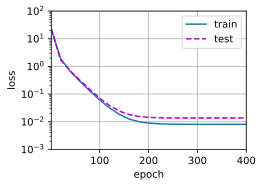

In [6]:
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

### 线性函数拟合（欠拟合）
让我们再看看线性函数拟合，减少该模型的训练损失相对困难。 在最后一个迭代周期完成后，训练损失仍然很高。 当用来拟合非线性模式（如这里的三阶多项式函数）时，线性模型容易欠拟合。

weight: [[3.6155562 3.9617643]]


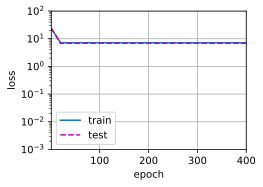

In [7]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

### 高阶多项式函数拟合（过拟合）
现在，让我们尝试使用一个阶数过高的多项式来训练模型。 在这种情况下，没有足够的数据用于学到高阶系数应该具有接近于零的值。 因此，这个过于复杂的模型会轻易受到训练数据中噪声的影响。 虽然训练损失可以有效地降低，但测试损失仍然很高。 结果表明，复杂模型对数据造成了过拟合。

weight: [[ 4.9830823e+00  1.2708569e+00 -3.3188009e+00  5.1161308e+00
  -3.2418627e-01  1.4224802e+00  1.5518212e-03 -9.9091856e-03
   1.2006901e-01 -1.6614299e-01  1.0797797e-01 -1.4551598e-01
   1.7071734e-01  2.9280398e-02  2.0717947e-01  1.6760807e-01
   1.7887020e-01 -9.6703596e-02  5.8896955e-02 -1.9178203e-01]]


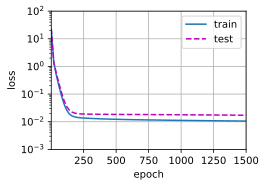

In [8]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

后面，学习过拟合问题和处理这些问题的方法，例如权重衰减和dropout。

### 小结
- 欠拟合是指模型无法继续减少训练误差。过拟合是指训练误差远小于验证误差。

- 由于不能基于训练误差来估计泛化误差，因此简单地最小化训练误差并不一定意味着泛化误差的减小。机器学习模型需要注意防止过拟合，即防止泛化误差过大。

- 验证集可以用于模型选择，但不能过于随意地使用它。

- 我们应该选择一个复杂度适当的模型，避免使用数量不足的训练样本。

## 权重衰减
我们总是可以通过去收集更多的训练数据来缓解过拟合。 但这可能成本很高，耗时颇多，或者完全超出我们的控制，因而在短期内不可能做到。 假设我们已经拥有尽可能多的高质量数据，我们便可以将重点放在正则化技术上。
在多项式回归的例子中， 我们可以通过调整拟合多项式的阶数来限制模型的容量。 实际上，限制特征的数量是缓解过拟合的一种常用技术。 然而，简单地丢弃特征对这项工作来说可能过于生硬。 我们继续思考多项式回归的例子，考虑高维输入可能发生的情况。 多项式对多变量数据的自然扩展称为单项式（monomials）， 也可以说是变量幂的乘积。 单项式的阶数是幂的和。 例如，$x_1^2 x_2$和$x_3 x_5^2$都是3次单项式。
注意，随着阶数$d$的增长，带有阶数$d$的项数迅速增加。 给定$k$个变量，阶数为$d$的项的个数为 ${k - 1 + d} \choose {k - 1}$，即$C^{k-1}_{k-1+d} = \frac{(k-1+d)!}{(d)!(k-1)!}$ 。 因此即使是阶数上的微小变化，比如从$2$到$3$，也会显著增加我们模型的复杂性。 仅仅通过简单的限制特征数量（在多项式回归中体现为限制阶数），可能仍然使模型在过简单和过复杂中徘徊， 我们需要一个更细粒度的工具来调整函数的复杂性，使其达到一个合适的平衡位置。 ## 范数与权重衰减
在训练参数化机器学习模型时， 权重衰减（weight decay）是最广泛使用的正则化的技术之一， 它通常也被称为$L_2$正则化。 这项技术通过函数与零的距离来衡量函数的复杂度， 因为在所有函数$f$中，函数$f=0$（所有输入都得到值$0$
） 在某种意义上是最简单的。 但是我们应该如何精确地测量一个函数和零之间的距离呢？ 没有一个正确的答案。 事实上，函数分析和巴拿赫空间理论的研究，都在致力于回答这个问题。
一种简单的方法是通过线性函数 $f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$
 中的权重向量的某个范数来度量其复杂性， 例如$\| \mathbf{w} \|^2$
。 要保证权重向量比较小， 最常用方法是将其范数作为惩罚项加到最小化损失的问题中。 将原来的训练目标最小化训练标签上的预测损失， 调整为最小化预测损失和惩罚项之和。 现在，如果我们的权重向量增长的太大， 我们的学习算法可能会更集中于最小化权重范数$\| \mathbf{w} \|^2$
。 这正是我们想要的。 让我们回顾一下之前的线性回归例子。 我们的损失由下式给出：
$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$
$\mathbf{x}^{(i)}$是样本的特征， $y^{(i)}$是样本$i$的标签， $(\mathbf{w}, b)$是权重和偏置参数。 为了惩罚权重向量的大小， 我们必须以某种方式在损失函数中添加$\| \mathbf{w} \|^2$， 但是模型应该如何平衡这个新的额外惩罚的损失？ 实际上，我们通过正则化常数
来描述这种权衡， 这是一个非负超参数，我们使用验证数据拟合：
$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2,$$
对于\lambda = 0
，我们恢复了原来的损失函数。 对于$\lambda > 0$，我们限制$\| \mathbf{w} \|$的大小。 这里我们仍然除以$2$：当我们取一个二次函数的导数时，$2$ 和$1/2$会抵消，以确保更新表达式看起来既漂亮又简单。 为什么在这里我们使用平方范数而不是标准范数（即欧几里得距离）？ 我们这样做是为了便于计算。 通过平方$L_2$范数，我们去掉平方根，留下权重向量每个分量的平方和。 这使得惩罚的导数很容易计算：导数的和等于和的导数。
此外，为什么我们首先使用$L_2$范数，而不是$L_1$范数。 事实上，这个选择在整个统计领域中都是有效的和受欢迎的。 $L_2$正则化线性模型构成经典的岭回归（ridge regression）算法， $L_1$正则化线性回归是统计学中类似的基本模型， 通常被称为套索回归（lasso regression）。 使用$L_2$范数的一个原因是它对权重向量的大分量施加了巨大的惩罚。 这使得我们的学习算法偏向于在大量特征上均匀分布权重的模型。 在实践中，这可能使它们对单个变量中的观测误差更为稳定。 相比之下，$L_1$惩罚会导致模型将权重集中在一小部分特征上， 而将其他权重清除为零。 这称为特征选择（feature selection），这可能是其他场景下需要的。
 
$L_2$正则化回归的小批量随机梯度下降更新如下式：
$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}$$
根据之前章节所讲的，我们根据估计值与观测值之间的差异来更新$2$。 然而，我们同时也在试图将$w$的大小缩小到零。 这就是为什么这种方法有时被称为权重衰减。 我们仅考虑惩罚项，优化算法在训练的每一步衰减权重。 与特征选择相比，权重衰减为我们提供了一种连续的机制来调整函数的复杂度。 较小的$\lambda$值对应较少约束的$w$， 而较大的$\lambda$值对$w$的约束更大。

是否对相应的偏置$b^2$进行惩罚在不同的实践中会有所不同， 在神经网络的不同层中也会有所不同。 通常，网络输出层的偏置项不会被正则化。

### 高维线性回归

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

首先，我们像以前一样生成一些数据，生成公式如下：
$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).$$
我们选择标签是关于输入的线性函数。 标签同时被均值为0，标准差为0.01高斯噪声破坏。 为了使过拟合的效果更加明显，我们可以将问题的维数增加到$d=200$
， 并使用一个只包含20个样本的小训练集。

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

### 从零开始实现
下面我们将从头开始实现权重衰减，只需将$L_2$的平方惩罚添加到原始目标函数中。

#### 初始化模型参数
首先，我们定义一个函数来随机初始化模型参数

In [6]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

#### 定义$L_2$范数惩罚
实现这一惩罚最方便的方法是对所有项求平方后并将它们求和。

In [3]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

#### 定义训练代码实现
下面的代码将模型拟合训练数据集，并在测试数据集上进行评估。

In [4]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

#### 忽略正则化直接训练
我们现在用lambd = 0禁用权重衰减后运行这个代码。 注意，这里训练误差有了减少，但测试误差没有减少， 这意味着出现了严重的过拟合。

w的L2范数是： 12.8096284866333


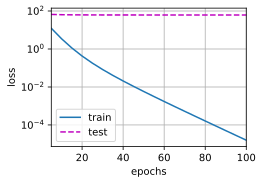

In [7]:
train(lambd=0)

#### 使用权重衰减
下面，我们使用权重衰减来运行代码。 注意，在这里训练误差增大，但测试误差减小。 这正是我们期望从正则化中得到的效果。

w的L2范数是： 0.05152054503560066


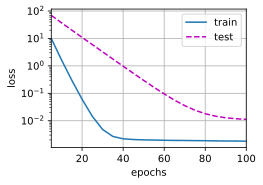

In [10]:
train(lambd=5)

### 简洁实现
由于权重衰减在神经网络优化中很常用， 深度学习框架为了便于我们使用权重衰减， 将权重衰减集成到优化算法中，以便与任何损失函数结合使用。 此外，这种集成还有计算上的好处， 允许在不增加任何额外的计算开销的情况下向算法中添加权重衰减。 由于更新的权重衰减部分仅依赖于每个参数的当前值， 因此优化器必须至少接触每个参数一次。

在下面的代码中，我们在实例化优化器时直接通过weight_decay指定weight decay超参数。 默认情况下，PyTorch同时衰减权重和偏移。 这里我们只为权重设置了weight_decay，所以偏置参数$b$
不会衰减。

In [11]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

这些图看起来和我们从零开始实现权重衰减时的图相同。 然而，它们运行得更快，更容易实现。 对于更复杂的问题，这一好处将变得更加明显。

w的L2范数： 13.79740047454834


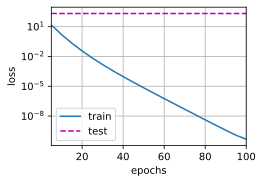

In [12]:
train_concise(0)

w的L2范数： 0.1384359449148178


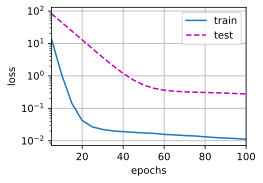

In [14]:
train_concise(5)

到目前为止，我们只接触到一个简单线性函数的概念。 此外，由什么构成一个简单的非线性函数可能是一个更复杂的问题。 例如，再生核希尔伯特空间（RKHS） 允许在非线性环境中应用为线性函数引入的工具。 不幸的是，基于RKHS的算法往往难以应用到大型、高维的数据。 在这本书中，我们将默认使用简单的启发式方法，即在深层网络的所有层上应用权重衰减。

### 小结
- 正则化是处理过拟合的常用方法：在训练集的损失函数中加入惩罚项，以降低学习到的模型的复杂度。

- 保持模型简单的一个特别的选择是使用
- 惩罚的权重衰减。这会导致学习算法更新步骤中的权重衰减。

- 权重衰减功能在深度学习框架的优化器中提供。

- 在同一训练代码实现中，不同的参数集可以有不同的更新行为。


## 暂退法
之前我们介绍了通过惩罚权重的$L_2$
范数来正则化统计模型的经典方法。 在概率角度看，我们可以通过以下论证来证明这一技术的合理性： 我们已经假设了一个先验，即权重的值取自均值为0的高斯分布。 更直观的是，我们希望模型深度挖掘特征，即将其权重分散到许多特征中， 而不是过于依赖少数潜在的虚假关联。

### 重新审视过拟合
当面对更多的特征而样本不足时，线性模型往往会过拟合。 相反，当给出更多样本而不是特征，通常线性模型不会过拟合。 不幸的是，线性模型泛化的可靠性是有代价的。 简单地说，线性模型没有考虑到特征之间的交互作用。 对于每个特征，线性模型必须指定正的或负的权重，而忽略其他特征。

泛化性和灵活性之间的这种基本权衡被描述为偏差-方差权衡（bias-variance tradeoff）。 线性模型有很高的偏差：它们只能表示一小类函数。 然而，这些模型的方差很低：它们在不同的随机数据样本上可以得出相似的结果。

深度神经网络位于偏差-方差谱的另一端。 与线性模型不同，神经网络并不局限于单独查看每个特征，而是学习特征之间的交互。 例如，神经网络可能推断“尼日利亚”和“西联汇款”一起出现在电子邮件中表示垃圾邮件， 但单独出现则不表示垃圾邮件。

即使我们有比特征多得多的样本，深度神经网络也有可能过拟合。 2017年，一组研究人员通过在随机标记的图像上训练深度网络。 这展示了神经网络的极大灵活性，因为人类很难将输入和随机标记的输出联系起来， 但通过随机梯度下降优化的神经网络可以完美地标记训练集中的每一幅图像。 想一想这意味着什么？ 假设标签是随机均匀分配的，并且有10个类别，那么分类器在测试数据上很难取得高于10%的精度， 那么这里的泛化差距就高达90%，如此严重的过拟合。

深度网络的泛化性质令人费解，而这种泛化性质的数学基础仍然是悬而未决的研究问题。 我们鼓励喜好研究理论的读者更深入地研究这个主题。 本节，我们将着重对实际工具的探究，这些工具倾向于改进深层网络的泛化性。

### 扰动的稳健性
在探究泛化性之前，我们先来定义一下什么是一个“好”的预测模型？ 我们期待“好”的预测模型能在未知的数据上有很好的表现： 经典泛化理论认为，为了缩小训练和测试性能之间的差距，应该以简单的模型为目标。 简单性以较小维度的形式展现， 之前讨论线性模型的单项式函数时探讨了这一点。 此外，正如我们讨论权重衰减（$L_2$正则化）时看到的那样， 参数的范数也代表了一种有用的简单性度量。

简单性的另一个角度是平滑性，即函数不应该对其输入的微小变化敏感。 例如，当我们对图像进行分类时，我们预计向像素添加一些随机噪声应该是基本无影响的。 1995年，克里斯托弗·毕晓普证明了 具有输入噪声的训练等价于Tikhonov正则化 (Bishop, 1995)。 这项工作用数学证实了“要求函数光滑”和“要求函数对输入的随机噪声具有适应性”之间的联系。

然后在2014年，斯里瓦斯塔瓦等人 (Srivastava et al., 2014) 就如何将毕晓普的想法应用于网络的内部层提出了一个想法： 在训练过程中，他们建议在计算后续层之前向网络的每一层注入噪声。 因为当训练一个有多层的深层网络时，注入噪声只会在输入-输出映射上增强平滑性。

这个想法被称为暂退法（dropout）。 暂退法在前向传播过程中，计算每一内部层的同时注入噪声，这已经成为训练神经网络的常用技术。 这种方法之所以被称为暂退法，因为我们从表面上看是在训练过程中丢弃（drop out）一些神经元。 在整个训练过程的每一次迭代中，标准暂退法包括在计算下一层之前将当前层中的一些节点置零。

需要说明的是，暂退法的原始论文提到了一个关于有性繁殖的类比： 神经网络过拟合与每一层都依赖于前一层激活值相关，称这种情况为“共适应性”。 作者认为，暂退法会破坏共适应性，就像有性生殖会破坏共适应的基因一样。

那么关键的挑战就是如何注入这种噪声。 一种想法是以一种无偏向（unbiased）的方式注入噪声。 这样在固定住其他层时，每一层的期望值等于没有噪音时的值。

在毕晓普的工作中，他将高斯噪声添加到线性模型的输入中。 在每次训练迭代中，他将从均值为零的分布
$\epsilon \sim\mathcal{N}(0,\sigma^2)$采样噪声添加到输入$\mathbf{x}$， 从而产生扰动点$\mathbf{x}' = \mathbf{x} + \epsilon$， 预期是$E[\mathbf{x}'] = \mathbf{x}$。

在标准暂退法正则化中，通过按保留（未丢弃）的节点的分数进行规范化来消除每一层的偏差。 换言之，每个中间活性值$h$以暂退概率$p$由随机变量$h'$替换，如下所示：
$$\begin{split}\begin{aligned}
h' =
\begin{cases}
    0 & \text{ 概率为 } p \\
    \frac{h}{1-p} & \text{ 其他情况}
\end{cases}
\end{aligned}\end{split}$$

根据此模型的设计，其期望值保持不变，即$E[h'] = h$。

### 实践中的暂退法
 当我们将暂退法应用到隐藏层，以$p$的概率将隐藏单元置为零时， 结果可以看作一个只包含原始神经元子集的网络。删除了$h_2$和$h_5$， 因此输出的计算不再依赖于$h_2$或$h_5$，并且它们各自的梯度在执行反向传播时也会消失。 这样，输出层的计算不能过度依赖于$h_1, \ldots, h_5$的任何一个元素。
 ![](https://zh.d2l.ai/_images/dropout2.svg)
 通常，我们在测试时不用暂退法。 给定一个训练好的模型和一个新的样本，我们不会丢弃任何节点，因此不需要标准化。 然而也有一些例外：一些研究人员在测试时使用暂退法， 用于估计神经网络预测的“不确定性”： 如果通过许多不同的暂退法遮盖后得到的预测结果都是一致的，那么我们可以说网络发挥更稳定。

### 从零开始实现
要实现单层的暂退法函数， 我们从均匀分布$U[0, 1]$中抽取样本，样本数与这层神经网络的维度一致。 然后我们保留那些对应样本大于$p$的节点，把剩下的丢弃。

在下面的代码中，我们实现 dropout_layer 函数， 该函数以dropout的概率丢弃张量输入X中的元素， 如上所述重新缩放剩余部分：将剩余部分除以1.0-dropout。

In [1]:
import torch
from torch import nn
from d2l import torch as d2l


def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

我们可以通过下面几个例子来测试dropout_layer函数。 我们将输入X通过暂退法操作，暂退概率分别为0、0.5和1。

In [2]:
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  0.,  0.,  0., 10.,  0., 14.],
        [ 0., 18., 20.,  0.,  0., 26., 28.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


### 定义模型参数
同样，我们使用引入的Fashion-MNIST数据集。 我们定义具有两个隐藏层的多层感知机，每个隐藏层包含256个单元。

In [3]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

### 定义模型
我们可以将暂退法应用于每个隐藏层的输出（在激活函数之后）， 并且可以为每一层分别设置暂退概率： 常见的技巧是在靠近输入层的地方设置较低的暂退概率。 下面的模型将第一个和第二个隐藏层的暂退概率分别设置为0.2和0.5， 并且暂退法只在训练期间有效。

In [4]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

### 训练和测试
这类似于前面描述的多层感知机训练和测试。

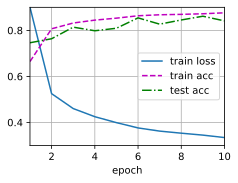

In [5]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 简洁实现
对于深度学习框架的高级API，我们只需在每个全连接层之后添加一个Dropout层， 将暂退概率作为唯一的参数传递给它的构造函数。 在训练时，Dropout层将根据指定的暂退概率随机丢弃上一层的输出（相当于下一层的输入）。 在测试时，Dropout层仅传递数据。

In [6]:
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

接下来，我们对模型进行训练和测试。

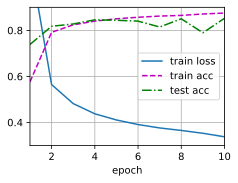

In [7]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 小结
- 暂退法在前向传播过程中，计算每一内部层的同时丢弃一些神经元。

- 暂退法可以避免过拟合，它通常与控制权重向量的维数和大小结合使用的。

- 暂退法将活性值$h$替换为具有期望值$h$的随机变量。

- 暂退法仅在训练期间使用。

## 前向传播、反向传播和计算图
我们已经学习了如何用小批量随机梯度下降训练模型。 然而当实现该算法时，我们只考虑了通过前向传播（forward propagation）所涉及的计算。 在计算梯度时，我们只调用了深度学习框架提供的反向传播函数，而不知其所以然。

梯度的自动计算（自动微分）大大简化了深度学习算法的实现。 在自动微分之前，即使是对复杂模型的微小调整也需要手工重新计算复杂的导数， 学术论文也不得不分配大量页面来推导更新规则。 本节将通过一些基本的数学和计算图， 深入探讨反向传播的细节。 首先，我们将重点放在带权重衰减（$L_2$正则化）的单隐藏层多层感知机上。

### 前向传播
*前向传播*（forward propagation或forward pass）
指的是：按顺序（从输入层到输出层）计算和存储神经网络中每层的结果。

我们将一步步研究单隐藏层神经网络的机制，
为了简单起见，我们假设输入样本是 $\mathbf{x}\in \mathbb{R}^d$，
并且我们的隐藏层不包括偏置项。
这里的中间变量是：

$$\mathbf{z}= \mathbf{W}^{(1)} \mathbf{x},$$

其中$\mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$
是隐藏层的权重参数。
将中间变量$\mathbf{z}\in \mathbb{R}^h$通过激活函数$\phi$后，
我们得到长度为$h$的隐藏激活向量：

$$\mathbf{h}= \phi (\mathbf{z}).$$

隐藏变量$\mathbf{h}$也是一个中间变量。
假设输出层的参数只有权重$\mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$，
我们可以得到输出层变量，它是一个长度为$q$的向量：

$$\mathbf{o}= \mathbf{W}^{(2)} \mathbf{h}.$$

假设损失函数为$l$，样本标签为$y$，我们可以计算单个数据样本的损失项，

$$L = l(\mathbf{o}, y).$$

根据$L_2$正则化的定义，给定超参数$\lambda$，正则化项为

$$s = \frac{\lambda}{2} \left(\|\mathbf{W}^{(1)}\|_F^2 + \|\mathbf{W}^{(2)}\|_F^2\right),$$

其中矩阵的Frobenius范数是将矩阵展平为向量后应用的$L_2$范数。
最后，模型在给定数据样本上的正则化损失为：

$$J = L + s.$$

在下面的讨论中，我们将$J$称为*目标函数*（objective function）。

### 前向传播计算图

绘制*计算图*有助于我们可视化计算中操作符和变量的依赖关系。 是与上述简单网络相对应的计算图，
 其中正方形表示变量，圆圈表示操作符。
 左下角表示输入，右上角表示输出。
 注意显示数据流的箭头方向主要是向右和向上的。

![前向传播的计算图](https://zh.d2l.ai/_images/forward.svg)


### 反向传播

*反向传播*（backward propagation或backpropagation）指的是计算神经网络参数梯度的方法。
简言之，该方法根据微积分中的*链式规则*，按相反的顺序从输出层到输入层遍历网络。
该算法存储了计算某些参数梯度时所需的任何中间变量（偏导数）。
假设我们有函数$\mathsf{Y}=f(\mathsf{X})$和$\mathsf{Z}=g(\mathsf{Y})$，
其中输入和输出$\mathsf{X}, \mathsf{Y}, \mathsf{Z}$是任意形状的张量。
利用链式法则，我们可以计算$\mathsf{Z}$关于$\mathsf{X}$的导数

$$\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \text{prod}\left(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}}\right).$$

在这里，我们使用$\text{prod}$运算符在执行必要的操作（如换位和交换输入位置）后将其参数相乘。
对于向量，这很简单，它只是矩阵-矩阵乘法。
对于高维张量，我们使用适当的对应项。
运算符$\text{prod}$指代了所有的这些符号。

回想一下，在计算图中的单隐藏层简单网络的参数是
$\mathbf{W}^{(1)}$和$\mathbf{W}^{(2)}$。
反向传播的目的是计算梯度$\partial J/\partial \mathbf{W}^{(1)}$和
$\partial J/\partial \mathbf{W}^{(2)}$。
为此，我们应用链式法则，依次计算每个中间变量和参数的梯度。
计算的顺序与前向传播中执行的顺序相反，因为我们需要从计算图的结果开始，并朝着参数的方向努力。第一步是计算目标函数$J=L+s$相对于损失项$L$和正则项$s$的梯度。

$$\frac{\partial J}{\partial L} = 1 \; \text{and} \; \frac{\partial J}{\partial s} = 1.$$

接下来，我们根据链式法则计算目标函数关于输出层变量$\mathbf{o}$的梯度：

$$
\frac{\partial J}{\partial \mathbf{o}}
= \text{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}}\right)
= \frac{\partial L}{\partial \mathbf{o}}
\in \mathbb{R}^q.
$$

接下来，我们计算正则化项相对于两个参数的梯度：

$$\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)}
\; \text{and} \;
\frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}.$$

现在我们可以计算最接近输出层的模型参数的梯度
$\partial J/\partial \mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$。
使用链式法则得出：

$$\frac{\partial J}{\partial \mathbf{W}^{(2)}}= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}}\right)= \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.$$

为了获得关于$\mathbf{W}^{(1)}$的梯度，我们需要继续沿着输出层到隐藏层反向传播。
关于隐藏层输出的梯度$\partial J/\partial \mathbf{h} \in \mathbb{R}^h$由下式给出：

$$
\frac{\partial J}{\partial \mathbf{h}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}}\right)
= {\mathbf{W}^{(2)}}^\top \frac{\partial J}{\partial \mathbf{o}}.
$$

由于激活函数$\phi$是按元素计算的，
计算中间变量$\mathbf{z}$的梯度$\partial J/\partial \mathbf{z} \in \mathbb{R}^h$
需要使用按元素乘法运算符，我们用$\odot$表示：

$$
\frac{\partial J}{\partial \mathbf{z}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}}\right)
= \frac{\partial J}{\partial \mathbf{h}} \odot \phi'\left(\mathbf{z}\right).
$$

最后，我们可以得到最接近输入层的模型参数的梯度
$\partial J/\partial \mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$。
根据链式法则，我们得到：

$$
\frac{\partial J}{\partial \mathbf{W}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}}\right)
= \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}.
$$


### 训练神经网络

在训练神经网络时，前向传播和反向传播相互依赖。
对于前向传播，我们沿着依赖的方向遍历计算图并计算其路径上的所有变量。
然后将这些用于反向传播，其中计算顺序与计算图的相反。

以上述简单网络为例：一方面，在前向传播期间计算正则项
取决于模型参数$\mathbf{W}^{(1)}$和
$\mathbf{W}^{(2)}$的当前值。
它们是由优化算法根据最近迭代的反向传播给出的。
另一方面，反向传播期间参数的梯度计算，
取决于由前向传播给出的隐藏变量$\mathbf{h}$的当前值。

因此，在训练神经网络时，在初始化模型参数后，
我们交替使用前向传播和反向传播，利用反向传播给出的梯度来更新模型参数。
注意，反向传播重复利用前向传播中存储的中间值，以避免重复计算。
带来的影响之一是我们需要保留中间值，直到反向传播完成。
这也是训练比单纯的预测需要更多的内存（显存）的原因之一。
此外，这些中间值的大小与网络层的数量和批量的大小大致成正比。
因此，使用更大的批量来训练更深层次的网络更容易导致*内存不足*（out of memory）错误。

### 小结

- 前向传播在神经网络定义的计算图中按顺序计算和存储中间变量，它的顺序是从输入层到输出层。
- 反向传播按相反的顺序（从输出层到输入层）计算和存储神经网络的中间变量和参数的梯度。
-  在训练深度学习模型时，前向传播和反向传播是相互依赖的。
-  训练比预测需要更多的内存。

## 数值稳定性和模型初始化


到目前为止，我们实现的每个模型都是根据某个预先指定的分布来初始化模型的参数。
有人会认为初始化方案是理所当然的，忽略了如何做出这些选择的细节。甚至有人可能会觉得，初始化方案的选择并不是特别重要。
相反，初始化方案的选择在神经网络学习中起着举足轻重的作用，
它对保持数值稳定性至关重要。
此外，这些初始化方案的选择可以与非线性激活函数的选择有趣的结合在一起。
我们选择哪个函数以及如何初始化参数可以决定优化算法收敛的速度有多快。
糟糕选择可能会导致我们在训练时遇到梯度爆炸或梯度消失。
本节将更详细地探讨这些主题，并讨论一些有用的启发式方法。
这些启发式方法在整个深度学习生涯中都很有用。

### 梯度消失和梯度爆炸

考虑一个具有$L$层、输入$\mathbf{x}$和输出$\mathbf{o}$的深层网络。
每一层$l$由变换$f_l$定义，
该变换的参数为权重$\mathbf{W}^{(l)}$，
其隐藏变量是$\mathbf{h}^{(l)}$（令 $\mathbf{h}^{(0)} = \mathbf{x}$）。
我们的网络可以表示为：

$$\mathbf{h}^{(l)} = f_l (\mathbf{h}^{(l-1)}) \text{ 因此 } \mathbf{o} = f_L \circ \ldots \circ f_1(\mathbf{x}).$$

如果所有隐藏变量和输入都是向量，
我们可以将$\mathbf{o}$关于任何一组参数$\mathbf{W}^{(l)}$的梯度写为下式：

$$\partial_{\mathbf{W}^{(l)}} \mathbf{o} = \underbrace{\partial_{\mathbf{h}^{(L-1)}} \mathbf{h}^{(L)}}_{ \mathbf{M}^{(L)} \stackrel{\mathrm{def}}{=}} \cdot \ldots \cdot \underbrace{\partial_{\mathbf{h}^{(l)}} \mathbf{h}^{(l+1)}}_{ \mathbf{M}^{(l+1)} \stackrel{\mathrm{def}}{=}} \underbrace{\partial_{\mathbf{W}^{(l)}} \mathbf{h}^{(l)}}_{ \mathbf{v}^{(l)} \stackrel{\mathrm{def}}{=}}.$$

换言之，该梯度是$L-l$个矩阵
$\mathbf{M}^{(L)} \cdot \ldots \cdot \mathbf{M}^{(l+1)}$
与梯度向量 $\mathbf{v}^{(l)}$的乘积。
因此，我们容易受到数值下溢问题的影响.
当将太多的概率乘在一起时，这些问题经常会出现。
在处理概率时，一个常见的技巧是切换到对数空间，
即将数值表示的压力从尾数转移到指数。
不幸的是，上面的问题更为严重：
最初，矩阵 $\mathbf{M}^{(l)}$ 可能具有各种各样的特征值。
他们可能很小，也可能很大；
他们的乘积可能非常大，也可能非常小。

不稳定梯度带来的风险不止在于数值表示；
不稳定梯度也威胁到我们优化算法的稳定性。
我们可能面临一些问题。
要么是*梯度爆炸*（gradient exploding）问题：
参数更新过大，破坏了模型的稳定收敛；
要么是*梯度消失*（gradient vanishing）问题：
参数更新过小，在每次更新时几乎不会移动，导致模型无法学习。

### 梯度消失

曾经sigmoid函数$1/(1 + \exp(-x))$（提到过）很流行，
因为它类似于阈值函数。
由于早期的人工神经网络受到生物神经网络的启发，
神经元要么完全激活要么完全不激活（就像生物神经元）的想法很有吸引力。
然而，它却是导致梯度消失问题的一个常见的原因，
让我们仔细看看sigmoid函数为什么会导致梯度消失。


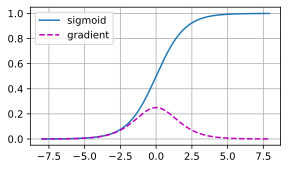

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

正如上图，当sigmoid函数的输入很大或是很小时，它的梯度都会消失。
此外，当反向传播通过许多层时，除非我们在刚刚好的地方，
这些地方sigmoid函数的输入接近于零，否则整个乘积的梯度可能会消失。
当我们的网络有很多层时，除非我们很小心，否则在某一层可能会切断梯度。
事实上，这个问题曾经困扰着深度网络的训练。
因此，更稳定的ReLU系列函数已经成为从业者的默认选择（虽然在神经科学的角度看起来不太合理）。

### 梯度爆炸

相反，梯度爆炸可能同样令人烦恼。
为了更好地说明这一点，我们生成100个高斯随机矩阵，并将它们与某个初始矩阵相乘。
对于我们选择的尺度（方差$\sigma^2=1$），矩阵乘积发生爆炸。
当这种情况是由于深度网络的初始化所导致时，我们没有机会让梯度下降优化器收敛。


In [2]:
M = torch.normal(0, 1, size=(4,4))
print('一个矩阵 \n',M)
for i in range(100):
    M = torch.mm(M,torch.normal(0, 1, size=(4, 4)))

print('乘以100个矩阵后\n', M)

一个矩阵 
 tensor([[-0.8035, -1.9119, -0.4208,  1.4959],
        [ 0.6654, -0.0998, -1.1833,  0.0246],
        [-1.3040, -1.5137,  0.7932,  0.3099],
        [-0.3545, -0.2330,  1.7309,  2.3127]])
乘以100个矩阵后
 tensor([[-9.6858e+25,  5.5851e+25,  4.0672e+25, -2.0353e+26],
        [ 1.7511e+22, -1.0097e+22, -7.3531e+21,  3.6797e+22],
        [-2.7876e+25,  1.6074e+25,  1.1705e+25, -5.8577e+25],
        [-1.4735e+26,  8.4967e+25,  6.1875e+25, -3.0964e+26]])


### 打破对称性

神经网络设计中的另一个问题是其参数化所固有的对称性。
假设我们有一个简单的多层感知机，它有一个隐藏层和两个隐藏单元。
在这种情况下，我们可以对第一层的权重$\mathbf{W}^{(1)}$进行重排列，
并且同样对输出层的权重进行重排列，可以获得相同的函数。
第一个隐藏单元与第二个隐藏单元没有什么特别的区别。
换句话说，我们在每一层的隐藏单元之间具有排列对称性。

假设输出层将上述两个隐藏单元的多层感知机转换为仅一个输出单元。
想象一下，如果我们将隐藏层的所有参数初始化为$\mathbf{W}^{(1)} = c$，
$c$为常量，会发生什么？
在这种情况下，在前向传播期间，两个隐藏单元采用相同的输入和参数，
产生相同的激活，该激活被送到输出单元。
在反向传播期间，根据参数$\mathbf{W}^{(1)}$对输出单元进行微分，
得到一个梯度，其元素都取相同的值。
因此，在基于梯度的迭代（例如，小批量随机梯度下降）之后，
$\mathbf{W}^{(1)}$的所有元素仍然采用相同的值。
这样的迭代永远不会打破对称性，我们可能永远也无法实现网络的表达能力。
隐藏层的行为就好像只有一个单元。
请注意，虽然小批量随机梯度下降不会打破这种对称性，但暂退法正则化可以。

## 参数初始化

解决（或至少减轻）上述问题的一种方法是进行参数初始化，
优化期间的注意和适当的正则化也可以进一步提高稳定性。

### 默认初始化

在前面的部分中，我们使用正态分布来初始化权重值。如果我们不指定初始化方法，
框架将使用默认的随机初始化方法，对于中等难度的问题，这种方法通常很有效。

### Xavier初始化

让我们看看某些*没有非线性*的全连接层输出（例如，隐藏变量）$o_{i}$的尺度分布。
对于该层$n_\mathrm{in}$输入$x_j$及其相关权重$w_{ij}$，输出由下式给出

$$o_{i} = \sum_{j=1}^{n_\mathrm{in}} w_{ij} x_j.$$

权重$w_{ij}$都是从同一分布中独立抽取的。
此外，让我们假设该分布具有零均值和方差$\sigma^2$。
请注意，这并不意味着分布必须是高斯的，只是均值和方差需要存在。
现在，让我们假设层$x_j$的输入也具有零均值和方差$\gamma^2$，
并且它们独立于$w_{ij}$并且彼此独立。
在这种情况下，我们可以按如下方式计算$o_i$的平均值和方差：

$$
\begin{aligned}
    E[o_i] & = \sum_{j=1}^{n_\mathrm{in}} E[w_{ij} x_j] \\&= \sum_{j=1}^{n_\mathrm{in}} E[w_{ij}] E[x_j] \\&= 0, \\
    \mathrm{Var}[o_i] & = E[o_i^2] - (E[o_i])^2 \\
        & = \sum_{j=1}^{n_\mathrm{in}} E[w^2_{ij} x^2_j] - 0 \\
        & = \sum_{j=1}^{n_\mathrm{in}} E[w^2_{ij}] E[x^2_j] \\
        & = n_\mathrm{in} \sigma^2 \gamma^2.
\end{aligned}
$$

保持方差不变的一种方法是设置$n_\mathrm{in} \sigma^2 = 1$。
现在考虑反向传播过程，我们面临着类似的问题，尽管梯度是从更靠近输出的层传播的。
使用与前向传播相同的推断，我们可以看到，除非$n_\mathrm{out} \sigma^2 = 1$，
否则梯度的方差可能会增大，其中$n_\mathrm{out}$是该层的输出的数量。
这使得我们进退两难：我们不可能同时满足这两个条件。
相反，我们只需满足：

$$
\begin{aligned}
\frac{1}{2} (n_\mathrm{in} + n_\mathrm{out}) \sigma^2 = 1 \text{ 或等价于 }
\sigma = \sqrt{\frac{2}{n_\mathrm{in} + n_\mathrm{out}}}.
\end{aligned}
$$

这就是现在标准且实用的*Xavier初始化*的基础，
它以其提出者 Glorot.Bengio.2010 第一作者的名字命名。
通常，Xavier初始化从均值为零，方差
$\sigma^2 = \frac{2}{n_\mathrm{in} + n_\mathrm{out}}$
的高斯分布中采样权重。
我们也可以利用Xavier的直觉来选择从均匀分布中抽取权重时的方差。
注意均匀分布$U(-a, a)$的方差为$\frac{a^2}{3}$。
将$\frac{a^2}{3}$代入到$\sigma^2$的条件中，将得到初始化值域：

$$U\left(-\sqrt{\frac{6}{n_\mathrm{in} + n_\mathrm{out}}}, \sqrt{\frac{6}{n_\mathrm{in} + n_\mathrm{out}}}\right).$$

尽管在上述数学推理中，“不存在非线性”的假设在神经网络中很容易被违反，
但Xavier初始化方法在实践中被证明是有效的。

### 额外阅读

上面的推理仅仅触及了现代参数初始化方法的皮毛。
深度学习框架通常实现十几种不同的启发式方法。
此外，参数初始化一直是深度学习基础研究的热点领域。
其中包括专门用于参数绑定（共享）、超分辨率、序列模型和其他情况的启发式算法。
例如，Xiao等人演示了通过使用精心设计的初始化方法
 Xiao.Bahri.Sohl-Dickstein.ea.2018，
可以无须架构上的技巧而训练10000层神经网络的可能性。

如果有读者对该主题感兴趣，我们建议深入研究本模块的内容，
阅读提出并分析每种启发式方法的论文，然后探索有关该主题的最新出版物。
也许会偶然发现甚至发明一个聪明的想法，并为深度学习框架提供一个实现。

## 小结

-  梯度消失和梯度爆炸是深度网络中常见的问题。在参数初始化时需要非常小心，以确保梯度和参数可以得到很好的控制。
-  需要用启发式的初始化方法来确保初始梯度既不太大也不太小。
-  ReLU激活函数缓解了梯度消失问题，这样可以加速收敛。
-  随机初始化是保证在进行优化前打破对称性的关键。
-  Xavier初始化表明，对于每一层，输出的方差不受输入数量的影响，任何梯度的方差不受输出数量的影响。




## 环境和分布偏移

前面我们学习了许多机器学习的实际应用，将模型拟合各种数据集。
然而，我们从来没有想过数据最初从哪里来？以及我们计划最终如何处理模型的输出？
通常情况下，开发人员会拥有一些数据且急于开发模型，而不关注这些基本问题。

许多失败的机器学习部署（即实际应用）都可以追究到这种方式。
有时，根据测试集的精度衡量，模型表现得非常出色。
但是当数据分布突然改变时，模型在部署中会出现灾难性的失败。
更隐蔽的是，有时模型的部署本身就是扰乱数据分布的催化剂。
举一个有点荒谬却可能真实存在的例子。
假设我们训练了一个贷款申请人违约风险模型，用来预测谁将偿还贷款或违约。
这个模型发现申请人的鞋子与违约风险相关（穿牛津鞋申请人会偿还，穿运动鞋申请人会违约）。
此后，这个模型可能倾向于向所有穿着牛津鞋的申请人发放贷款，并拒绝所有穿着运动鞋的申请人。

这种情况可能会带来灾难性的后果。
首先，一旦模型开始根据鞋类做出决定，顾客就会理解并改变他们的行为。
不久，所有的申请者都会穿牛津鞋，而信用度却没有相应的提高。
总而言之，机器学习的许多应用中都存在类似的问题：
通过将基于模型的决策引入环境，我们可能会破坏模型。

虽然我们不可能在一节中讨论全部的问题，但我们希望揭示一些常见的问题，
并激发批判性思考，以便及早发现这些情况，减轻灾难性的损害。
有些解决方案很简单（要求“正确”的数据），有些在技术上很困难（实施强化学习系统），
还有一些解决方案要求我们完全跳出统计预测，解决一些棘手的、与算法伦理应用有关的哲学问题。

### 分布偏移的类型

首先，我们考虑数据分布可能发生变化的各种方式，以及为挽救模型性能可能采取的措施。
在一个经典的情景中，假设训练数据是从某个分布$p_S(\mathbf{x},y)$中采样的，
但是测试数据将包含从不同分布$p_T(\mathbf{x},y)$中抽取的未标记样本。
一个清醒的现实是：如果没有任何关于$p_S$和$p_T$之间相互关系的假设，
学习到一个分类器是不可能的。

考虑一个二元分类问题：区分狗和猫。
如果分布可以以任意方式偏移，那么我们的情景允许病态的情况，
即输入的分布保持不变：$p_S(\mathbf{x}) = p_T(\mathbf{x})$，
但标签全部翻转：$p_S(y | \mathbf{x}) = 1 - p_T(y | \mathbf{x})$。
换言之，如果将来所有的“猫”现在都是狗，而我们以前所说的“狗”现在是猫。
而此时输入$p(\mathbf{x})$的分布没有任何改变，
那么我们就不可能将这种情景与分布完全没有变化的情景区分开。

幸运的是，在对未来我们的数据可能发生变化的一些限制性假设下，
有些算法可以检测这种偏移，甚至可以动态调整，提高原始分类器的精度。

### 协变量偏移

在不同分布偏移中，协变量偏移可能是最为广泛研究的。
这里我们假设：虽然输入的分布可能随时间而改变，
但标签函数（即条件分布$P(y \mid \mathbf{x})$）没有改变。
统计学家称之为*协变量偏移*（covariate shift），
因为这个问题是由于协变量（特征）分布的变化而产生的。
虽然有时我们可以在不引用因果关系的情况下对分布偏移进行推断，
但在我们认为$\mathbf{x}$导致$y$的情况下，协变量偏移是一种自然假设。

考虑一下区分猫和狗的问题：训练数据包括下图中的图像。

![区分猫和狗的训练数据](https://zh.d2l.ai/_images/cat-dog-train.svg)


在测试时，我们被要求对下图中的图像进行分类。

![区分猫和狗的测试数据](https://zh.d2l.ai/_images/cat-dog-test.svg)
训练集由真实照片组成，而测试集只包含卡通图片。
假设在一个与测试集的特征有着本质不同的数据集上进行训练，
如果没有方法来适应新的领域，可能会有麻烦。

### 标签偏移

*标签偏移*（label shift）描述了与协变量偏移相反的问题。
这里我们假设标签边缘概率$P(y)$可以改变，
但是类别条件分布$P(\mathbf{x} \mid y)$在不同的领域之间保持不变。
当我们认为$y$导致$\mathbf{x}$时，标签偏移是一个合理的假设。
例如，预测患者的疾病，我们可能根据症状来判断，
即使疾病的相对流行率随着时间的推移而变化。
标签偏移在这里是恰当的假设，因为疾病会引起症状。
在另一些情况下，标签偏移和协变量偏移假设可以同时成立。
例如，当标签是确定的，即使$y$导致$\mathbf{x}$，协变量偏移假设也会得到满足。
有趣的是，在这些情况下，使用基于标签偏移假设的方法通常是有利的。
这是因为这些方法倾向于包含看起来像标签（通常是低维）的对象，
而不是像输入（通常是高维的）对象。

### 概念偏移

我们也可能会遇到*概念偏移*（concept shift）：
当标签的定义发生变化时，就会出现这种问题。
这听起来很奇怪——一只猫就是一只猫，不是吗？
然而，其他类别会随着不同时间的用法而发生变化。
精神疾病的诊断标准、所谓的时髦、以及工作头衔等等，都是概念偏移的日常映射。
事实证明，假如我们环游美国，根据所在的地理位置改变我们的数据来源，
我们会发现关于“软饮”名称的分布发生了相当大的概念偏移，
如下图所示。

![美国软饮名称的概念偏移](https://zh.d2l.ai/_images/popvssoda.png)
如果我们要建立一个机器翻译系统，
$P(y \mid \mathbf{x})$的分布可能会因我们的位置不同而得到不同的翻译。
这个问题可能很难被发现。
所以，我们最好可以利用在时间或空间上逐渐发生偏移的知识。

### 分布偏移示例

在深入研究形式体系和算法之前，我们可以讨论一些协变量偏移或概念偏移可能并不明显的具体情况。

### 医学诊断

假设我们想设计一个检测癌症的算法，从健康人和病人那里收集数据，然后训练算法。
它工作得很好，有很高的精度，然后我们得出了已经准备好在医疗诊断上取得成功的结论。
请先别着急。

收集训练数据的分布和在实际中遇到的数据分布可能有很大的不同。
这件事在一个不幸的初创公司身上发生过，我们中的一些作者几年前和他们合作过。
他们正在研究一种血液检测方法，主要针对一种影响老年男性的疾病，
并希望利用他们从病人身上采集的血液样本进行研究。
然而，从健康男性身上获取血样比从系统中已有的病人身上获取要困难得多。
作为补偿，这家初创公司向一所大学校园内的学生征集献血，作为开发测试的健康对照样本。
然后这家初创公司问我们是否可以帮助他们建立一个用于检测疾病的分类器。

正如我们向他们解释的那样，用近乎完美的精度来区分健康和患病人群确实很容易。
然而，这可能是因为受试者在年龄、激素水平、体力活动、
饮食、饮酒以及其他许多与疾病无关的因素上存在差异。
这对检测疾病的分类器可能并不适用。
这些抽样可能会遇到极端的协变量偏移。
此外，这种情况不太可能通过常规方法加以纠正。
简言之，他们浪费了一大笔钱。

### 自动驾驶汽车

对于一家想利用机器学习来开发自动驾驶汽车的公司，一个关键部件是“路沿检测器”。
由于真实的注释数据获取成本很高，他们想出了一个“聪明”的想法：
将游戏渲染引擎中的合成数据用作额外的训练数据。
这对从渲染引擎中抽取的“测试数据”非常有效，但应用在一辆真正的汽车里真是一场灾难。
正如事实证明的那样，路沿被渲染成一种非常简单的纹理。
更重要的是，所有的路沿都被渲染成了相同的纹理，路沿检测器很快就学习到了这个“特征”。

当美军第一次试图在森林中探测坦克时，也发生了类似的事情。
他们在没有坦克的情况下拍摄了森林的航拍照片，然后把坦克开进森林，拍摄了另一组照片。
使用这两组数据训练的分类器似乎工作得很好。
不幸的是，分类器仅仅学会了如何区分有阴影的树和没有阴影的树：
第一组照片是在清晨拍摄的，而第二组是在中午拍摄的。

### 非平稳分布

当分布变化缓慢并且模型没有得到充分更新时，就会出现更微妙的情况：
*非平稳分布*（nonstationary distribution）。
以下是一些典型例子：

- 训练一个计算广告模型，但却没有经常更新（例如，一个2009年训练的模型不知道一个叫iPad的不知名新设备刚刚上市）；
- 建立一个垃圾邮件过滤器，它能很好地检测到所有垃圾邮件。但是，垃圾邮件发送者们变得聪明起来，制造出新的信息，看起来不像我们以前见过的任何垃圾邮件；
- 建立一个产品推荐系统，它在整个冬天都有效，但圣诞节过后很久还会继续推荐圣诞帽。

### 更多轶事

- 建立一个人脸检测器，它在所有基准测试中都能很好地工作，但是它在测试数据上失败了：有问题的例子是人脸充满了整个图像的特写镜头（训练集中没有这样的数据）。
- 为美国市场建立了一个网络搜索引擎，并希望将其部署到英国。
- 通过在一个大的数据集来训练图像分类器，其中每一个大类的数量在数据集近乎是平均的，比如1000个类别，每个类别由1000个图像表示。但是将该系统部署到真实世界中，照片的实际标签分布显然是不均匀的。

### 分布偏移纠正

正如我们所讨论的，在许多情况下训练和测试分布$P(\mathbf{x}, y)$是不同的。
在一些情况下，我们很幸运，不管协变量、标签或概念如何发生偏移，模型都能正常工作。
在另一些情况下，我们可以通过运用策略来应对这种偏移，从而做得更好。
本节的其余部分将着重于应对这种偏移的技术细节。

### 经验风险与实际风险

首先我们反思一下在模型训练期间到底发生了什么？
训练数据$\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_n, y_n)\}$
的特征和相关的标签经过迭代，在每一个小批量之后更新模型$f$的参数。
为了简单起见，我们不考虑正则化，因此极大地降低了训练损失：

$$\mathop{\mathrm{minimize}}_f \frac{1}{n} \sum_{i=1}^n l(f(\mathbf{x}_i), y_i),$$

其中$l$是损失函数，用来度量：
给定标签$y_i$，预测$f(\mathbf{x}_i)$的“糟糕程度”。
统计学家称这一项为经验风险。
*经验风险*（empirical risk）是为了近似真实风险（true risk），
整个训练数据上的平均损失，即从其真实分布$p(\mathbf{x},y)$中
抽取的所有数据的总体损失的期望值：

$$E_{p(\mathbf{x}, y)} [l(f(\mathbf{x}), y)] = \int\int l(f(\mathbf{x}), y) p(\mathbf{x}, y) \;d\mathbf{x}dy.$$

然而在实践中，我们通常无法获得总体数据。
因此，*经验风险最小化*即在中最小化经验风险，
是一种实用的机器学习策略，希望能近似最小化真实风险。

### 协变量偏移纠正

假设对于带标签的数据$(\mathbf{x}_i, y_i)$，
我们要评估$P(y \mid \mathbf{x})$。
然而观测值$\mathbf{x}_i$是从某些*源分布*$q(\mathbf{x})$中得出的，
而不是从*目标分布*$p(\mathbf{x})$中得出的。
幸运的是，依赖性假设意味着条件分布保持不变，即：
$p(y \mid \mathbf{x}) = q(y \mid \mathbf{x})$。
如果源分布$q(\mathbf{x})$是“错误的”，
我们可以通过在真实风险的计算中，使用以下简单的恒等式来进行纠正：

$$
\begin{aligned}
\int\int l(f(\mathbf{x}), y) p(y \mid \mathbf{x})p(\mathbf{x}) \;d\mathbf{x}dy =
\int\int l(f(\mathbf{x}), y) q(y \mid \mathbf{x})q(\mathbf{x})\frac{p(\mathbf{x})}{q(\mathbf{x})} \;d\mathbf{x}dy.
\end{aligned}
$$

换句话说，我们需要根据数据来自正确分布与来自错误分布的概率之比，
来重新衡量每个数据样本的权重：

$$\beta_i \stackrel{\mathrm{def}}{=} \frac{p(\mathbf{x}_i)}{q(\mathbf{x}_i)}.$$

将权重$\beta_i$代入到每个数据样本$(\mathbf{x}_i, y_i)$中，
我们可以使用”加权经验风险最小化“来训练模型：

$$\mathop{\mathrm{minimize}}_f \frac{1}{n} \sum_{i=1}^n \beta_i l(f(\mathbf{x}_i), y_i).$$

由于不知道这个比率，我们需要估计它。
有许多方法都可以用，包括一些花哨的算子理论方法，
试图直接使用最小范数或最大熵原理重新校准期望算子。
对于任意一种这样的方法，我们都需要从两个分布中抽取样本：
“真实”的分布$p$，通过访问测试数据获取；
训练集$q$，通过人工合成的很容易获得。
请注意，我们只需要特征$\mathbf{x} \sim p(\mathbf{x})$，
不需要访问标签$y \sim p(y)$。

在这种情况下，有一种非常有效的方法可以得到几乎与原始方法一样好的结果：
*对数几率回归*（logistic regression）。
这是用于二元分类的softmax回归的一个特例。
综上所述，我们学习了一个分类器来区分从$p(\mathbf{x})$抽取的数据
和从$q(\mathbf{x})$抽取的数据。
如果无法区分这两个分布，则意味着相关的样本可能来自这两个分布中的任何一个。
另一方面，任何可以很好区分的样本都应该相应地显著增加或减少权重。

为了简单起见，假设我们分别从$p(\mathbf{x})$和$q(\mathbf{x})$
两个分布中抽取相同数量的样本。
现在用$z$标签表示：从$p$抽取的数据为$1$，从$q$抽取的数据为$-1$。
然后，混合数据集中的概率由下式给出

$$P(z=1 \mid \mathbf{x}) = \frac{p(\mathbf{x})}{p(\mathbf{x})+q(\mathbf{x})} \text{ and hence } \frac{P(z=1 \mid \mathbf{x})}{P(z=-1 \mid \mathbf{x})} = \frac{p(\mathbf{x})}{q(\mathbf{x})}.$$

因此，如果我们使用对数几率回归方法，其中
$P(z=1 \mid \mathbf{x})=\frac{1}{1+\exp(-h(\mathbf{x}))}$
（$h$是一个参数化函数），则很自然有：

$$
\beta_i = \frac{1/(1 + \exp(-h(\mathbf{x}_i)))}{\exp(-h(\mathbf{x}_i))/(1 + \exp(-h(\mathbf{x}_i)))} = \exp(h(\mathbf{x}_i)).
$$

因此，我们需要解决两个问题：
第一个问题是关于区分来自两个分布的数据；
第二个问题是关于
中的加权经验风险的最小化问题。
在这个问题中，我们将对其中的项加权$\beta_i$。

现在，我们来看一下完整的协变量偏移纠正算法。
假设我们有一个训练集$\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_n, y_n)\}$
和一个未标记的测试集$\{\mathbf{u}_1, \ldots, \mathbf{u}_m\}$。
对于协变量偏移，我们假设$1 \leq i \leq n$的$\mathbf{x}_i$来自某个源分布，
$\mathbf{u}_i$来自目标分布。
以下是纠正协变量偏移的典型算法：

1. 生成一个二元分类训练集：$\{(\mathbf{x}_1, -1), \ldots, (\mathbf{x}_n, -1), (\mathbf{u}_1, 1), \ldots, (\mathbf{u}_m, 1)\}$。
1. 用对数几率回归训练二元分类器得到函数$h$。
1. 使用$\beta_i = \exp(h(\mathbf{x}_i))$或更好的$\beta_i = \min(\exp(h(\mathbf{x}_i)), c)$（$c$为常量）对训练数据进行加权。
1. 使用权重$\beta_i$进行$\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_n, y_n)\}$的训练。

请注意，上述算法依赖于一个重要的假设：
需要目标分布(例如，测试分布)中的每个数据样本在训练时出现的概率非零。
如果我们找到$p(\mathbf{x}) > 0$但$q(\mathbf{x}) = 0$的点，
那么相应的重要性权重会是无穷大。

### 标签偏移纠正

假设我们处理的是$k$个类别的分类任务。
使用相同符号，
$q$和$p$中分别是源分布（例如训练时的分布）和目标分布（例如测试时的分布）。
假设标签的分布随时间变化：$q(y) \neq p(y)$，
但类别条件分布保持不变：$q(\mathbf{x} \mid y)=p(\mathbf{x} \mid y)$。
如果源分布$q(y)$是“错误的”，
我们可以根据中定义的真实风险中的恒等式进行更正：

$$
\begin{aligned}
\int\int l(f(\mathbf{x}), y) p(\mathbf{x} \mid y)p(y) \;d\mathbf{x}dy =
\int\int l(f(\mathbf{x}), y) q(\mathbf{x} \mid y)q(y)\frac{p(y)}{q(y)} \;d\mathbf{x}dy.
\end{aligned}
$$

这里，重要性权重将对应于标签似然比率

$$\beta_i \stackrel{\mathrm{def}}{=} \frac{p(y_i)}{q(y_i)}.$$

标签偏移的一个好处是，如果我们在源分布上有一个相当好的模型，
那么我们可以得到对这些权重的一致估计，而不需要处理周边的其他维度。
在深度学习中，输入往往是高维对象（如图像），而标签通常是低维（如类别）。

为了估计目标标签分布，我们首先采用性能相当好的现成的分类器（通常基于训练数据进行训练），
并使用验证集（也来自训练分布）计算其混淆矩阵。
混淆矩阵$\mathbf{C}$是一个$k \times k$矩阵，
其中每列对应于标签类别，每行对应于模型的预测类别。
每个单元格的值$c_{ij}$是验证集中，真实标签为$j$，
而我们的模型预测为$i$的样本数量所占的比例。

现在，我们不能直接计算目标数据上的混淆矩阵，
因为我们无法看到真实环境下的样本的标签，
除非我们再搭建一个复杂的实时标注流程。
然而，我们所能做的是将所有模型在测试时的预测取平均数，
得到平均模型输出$\mu(\hat{\mathbf{y}}) \in \mathbb{R}^k$，
其中第$i$个元素$\mu(\hat{y}_i)$是我们模型预测测试集中$i$的总预测分数。

结果表明，如果我们的分类器一开始就相当准确，
并且目标数据只包含我们以前见过的类别，
以及如果标签偏移假设成立（这里最强的假设），
我们就可以通过求解一个简单的线性系统来估计测试集的标签分布

$$\mathbf{C} p(\mathbf{y}) = \mu(\hat{\mathbf{y}}),$$

因为作为一个估计，$\sum_{j=1}^k c_{ij} p(y_j) = \mu(\hat{y}_i)$
对所有$1 \leq i \leq k$成立，
其中$p(y_j)$是$k$维标签分布向量$p(\mathbf{y})$的第$j^\mathrm{th}$元素。
如果我们的分类器一开始就足够精确，那么混淆矩阵$\mathbf{C}$将是可逆的，
进而我们可以得到一个解$p(\mathbf{y}) = \mathbf{C}^{-1} \mu(\hat{\mathbf{y}})$。

因为我们观测源数据上的标签，所以很容易估计分布$q(y)$。
那么对于标签为$y_i$的任何训练样本$i$，
我们可以使用我们估计的$p(y_i)/q(y_i)$比率来计算权重$\beta_i$，
并将其代入加权经验风险最小化中。

### 概念偏移纠正

概念偏移很难用原则性的方式解决。
例如，在一个问题突然从“区分猫和狗”偏移为“区分白色和黑色动物”的情况下，
除了从零开始收集新标签和训练，别无妙方。
幸运的是，在实践中这种极端的偏移是罕见的。
相反，通常情况下，概念的变化总是缓慢的。
比如下面是一些例子：

- 在计算广告中，新产品推出后，旧产品变得不那么受欢迎了。这意味着广告的分布和受欢迎程度是逐渐变化的，任何点击率预测器都需要随之逐渐变化；
- 由于环境的磨损，交通摄像头的镜头会逐渐退化，影响摄像头的图像质量；
- 新闻内容逐渐变化（即新新闻的出现）。

在这种情况下，我们可以使用与训练网络相同的方法，使其适应数据的变化。
换言之，我们使用新数据更新现有的网络权重，而不是从头开始训练。

### 学习问题的分类法

有了如何处理分布变化的知识，我们现在可以考虑机器学习问题形式化的其他方面。

### 批量学习

在批量学习（batch learning）中，我们可以访问一组训练特征和标签
$\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_n, y_n)\}$，
我们使用这些特性和标签训练$f(\mathbf{x})$。
然后，我们部署此模型来对来自同一分布的新数据$(\mathbf{x}, y)$进行评分。
例如，我们可以根据猫和狗的大量图片训练猫检测器。
一旦我们训练了它，我们就把它作为智能猫门计算视觉系统的一部分，来控制只允许猫进入。
然后这个系统会被安装在客户家中，基本再也不会更新。

### 在线学习

除了“批量”地学习，我们还可以单个“在线”学习数据$(\mathbf{x}_i, y_i)$。
更具体地说，我们首先观测到$\mathbf{x}_i$，
然后我们得出一个估计值$f(\mathbf{x}_i)$，
只有当我们做到这一点后，我们才观测到$y_i$。
然后根据我们的决定，我们会得到奖励或损失。
许多实际问题都属于这一类。
例如，我们需要预测明天的股票价格，
这样我们就可以根据这个预测进行交易。
在一天结束时，我们会评估我们的预测是否盈利。
换句话说，在*在线学习*（online learning）中，我们有以下的循环。
在这个循环中，给定新的观测结果，我们会不断地改进我们的模型。

$$
\mathrm{model} ~ f_t \longrightarrow
\mathrm{data} ~ \mathbf{x}_t \longrightarrow
\mathrm{estimate} ~ f_t(\mathbf{x}_t) \longrightarrow
\mathrm{observation} ~ y_t \longrightarrow
\mathrm{loss} ~ l(y_t, f_t(\mathbf{x}_t)) \longrightarrow
\mathrm{model} ~ f_{t+1}
$$

### 老虎机

*老虎机*（bandits）是上述问题的一个特例。
虽然在大多数学习问题中，我们有一个连续参数化的函数$f$（例如，一个深度网络）。
但在一个*老虎机*问题中，我们只有有限数量的手臂可以拉动。
也就是说，我们可以采取的行动是有限的。
对于这个更简单的问题，可以获得更强的最优性理论保证，这并不令人惊讶。
我们之所以列出它，主要是因为这个问题经常被视为一个单独的学习问题的情景。

### 控制

在很多情况下，环境会记住我们所做的事。
不一定是以一种对抗的方式，但它会记住，而且它的反应将取决于之前发生的事情。
例如，咖啡锅炉控制器将根据之前是否加热锅炉来观测到不同的温度。
在这种情况下，PID（比例—积分—微分）控制器算法是一个流行的选择。
同样，一个用户在新闻网站上的行为将取决于之前向她展示的内容（例如，大多数新闻她只阅读一次）。
许多这样的算法形成了一个环境模型，在这个模型中，他们的行为使得他们的决策看起来不那么随机。
近年来，控制理论（如PID的变体）也被用于自动调整超参数，
以获得更好的解构和重建质量，提高生成文本的多样性和生成图像的重建质量。

### 强化学习

强化学习（reinforcement learning）强调如何基于环境而行动，以取得最大化的预期利益。
国际象棋、围棋、西洋双陆棋或星际争霸都是强化学习的应用实例。
再比如，为自动驾驶汽车制造一个控制器，或者以其他方式对自动驾驶汽车的驾驶方式做出反应
（例如，试图避开某物体，试图造成事故，或者试图与其合作）。

### 考虑到环境

上述不同情况之间的一个关键区别是：
在静止环境中可能一直有效的相同策略，
在环境能够改变的情况下可能不会始终有效。
例如，一个交易者发现的套利机会很可能在他开始利用它时就消失了。
环境变化的速度和方式在很大程度上决定了我们可以采用的算法类型。
例如，如果我们知道事情只会缓慢地变化，
就可以迫使任何估计也只能缓慢地发生改变。
如果我们知道环境可能会瞬间发生变化，但这种变化非常罕见，
我们就可以在使用算法时考虑到这一点。
当一个数据科学家试图解决的问题会随着时间的推移而发生变化时，
这些类型的知识至关重要。

###机器学习中的公平、责任和透明度

最后，重要的是，当我们部署机器学习系统时，
不仅仅是在优化一个预测模型，
而通常是在提供一个会被用来（部分或完全）进行自动化决策的工具。
这些技术系统可能会通过其进行的决定而影响到每个人的生活。

从考虑预测到决策的飞跃不仅提出了新的技术问题，
而且还提出了一系列必须仔细考虑的伦理问题。
如果我们正在部署一个医疗诊断系统，我们需要知道它可能适用于哪些人群，哪些人群可能无效。
忽视对一个亚群体的幸福的可预见风险可能会导致我们执行劣质的护理水平。
此外，一旦我们规划整个决策系统，我们必须退后一步，重新考虑如何评估我们的技术。
在这个视野变化所导致的结果中，我们会发现精度很少成为合适的衡量标准。
例如，当我们将预测转化为行动时，我们通常会考虑到各种方式犯错的潜在成本敏感性。
举个例子：将图像错误地分到某一类别可能被视为种族歧视，而错误地分到另一个类别是无害的，
那么我们可能需要相应地调整我们的阈值，在设计决策方式时考虑到这些社会价值。
我们还需要注意预测系统如何导致反馈循环。
例如，考虑预测性警务系统，它将巡逻人员分配到预测犯罪率较高的地区。
很容易看出一种令人担忧的模式是如何出现的：

 1. 犯罪率高的社区会得到更多的巡逻；
 2. 因此，在这些社区中会发现更多的犯罪行为，输入可用于未来迭代的训练数据；
 3. 面对更多的积极因素，该模型预测这些社区还会有更多的犯罪；
 4. 下一次迭代中，更新后的模型会更加倾向于针对同一个地区，这会导致更多的犯罪行为被发现等等。

通常，在建模纠正过程中，模型的预测与训练数据耦合的各种机制都没有得到解释，
研究人员称之为“失控反馈循环”的现象。
此外，我们首先要注意我们是否解决了正确的问题。
比如，预测算法现在在信息传播中起着巨大的中介作用，
个人看到的新闻应该由他们喜欢的Facebook页面决定吗？
这些只是在机器学习职业生涯中可能遇到的令人感到“压力山大”的道德困境中的一小部分。

### 小结

- 在许多情况下，训练集和测试集并不来自同一个分布。这就是所谓的分布偏移。
- 真实风险是从真实分布中抽取的所有数据的总体损失的预期。然而，这个数据总体通常是无法获得的。经验风险是训练数据的平均损失，用于近似真实风险。在实践中，我们进行经验风险最小化。
- 在相应的假设条件下，可以在测试时检测并纠正协变量偏移和标签偏移。在测试时，不考虑这种偏移可能会成为问题。
- 在某些情况下，环境可能会记住自动操作并以令人惊讶的方式做出响应。在构建模型时，我们必须考虑到这种可能性，并继续监控实时系统，并对我们的模型和环境以意想不到的方式纠缠在一起的可能性持开放态度。